In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

### 군집화

In [231]:
import pandas as pd

master_c0 = pd.read_excel('master_c0.xlsx')
master_c1 = pd.read_excel('master_c1.xlsx')
master_c2 = pd.read_excel('master_c2.xlsx')

# master_c0 = pd.read_excel('/content/drive/Othercomputers/내 컴퓨터/hmkd1/lmembers 분석/master_c0.xlsx', index_col=0)
# master_c1 = pd.read_excel('/content/drive/Othercomputers/내 컴퓨터/hmkd1/lmembers 분석/master_c1.xlsx', index_col=0)
# master_c2 = pd.read_excel('/content/drive/Othercomputers/내 컴퓨터/hmkd1/lmembers 분석/master_c2.xlsx', index_col=0)

In [92]:
master_c0

,고객번호,성별,연령대,거주지역,가공1Q,가공2Q,가공3Q,가공4Q,가공5Q,가공6Q,...,의료건수,교육/문화건수,뷰티건수,가전건수,가구건수,의류건수,스포츠건수,패션/잡화건수,유아/아동건수,명품건수
0,7,F,60세이상,36.0,5.971409e+05,4.474150e+05,4.685978e+05,426519.935520,3.857906e+05,5.052085e+05,...,2,11,10,3,6,64,23,38,2,7
1,10,F,60세이상,24.0,1.000434e+06,1.075190e+06,1.070681e+06,923334.239846,8.590279e+05,8.495463e+05,...,0,3,26,0,2,20,3,8,0,1
2,14,F,60세이상,43.0,3.312597e+05,9.036212e+05,6.010187e+05,917070.078827,7.906883e+05,9.265708e+05,...,3,0,10,4,7,85,34,26,4,7
3,17,M,60세이상,43.0,7.929832e+05,2.239841e+05,3.547607e+05,531128.910365,2.887288e+05,1.012485e+06,...,6,0,21,4,0,27,1,82,0,7
4,27,M,60세이상,60.0,2.369174e+05,3.683647e+05,2.546950e+05,199731.778094,2.783261e+05,2.733214e+05,...,36,0,37,0,0,52,9,12,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,19304,M,45세~49세,100.0,3.171741e+06,8.543744e+05,2.948943e+06,134895.100674,7.640881e+06,1.397808e+06,...,10,18,46,2,0,68,16,19,12,3
3302,19310,F,25세~29세,52.0,5.475334e+05,7.815504e+05,9.460728e+05,381158.436075,2.011801e+04,7.922125e+04,...,1,1,59,3,0,73,32,11,12,4
3303,19314,F,40세~44세,39.0,4.588928e+05,1.041665e+05,1.724042e+05,541997.877617,3.517720e+05,1.784892e+05,...,2,0,27,14,1,129,15,13,60,65
3304,19319,M,55세~59세,NaN,5.526488e+05,2.565940e+05,2.778146e+05,100760.354768,4.183131e+05,3.663832e+05,...,8,2,5,3,0,57,10,19,14,5


In [ ]:
# "8Q"가 포함된 컬럼 제거
columns_to_drop = [col for col in master_c0.columns if "8Q" in col]
master_c0 = master_c0.drop(columns=columns_to_drop)

columns_to_drop = [col for col in master_c1.columns if "8Q" in col]
master_c1 = master_c1.drop(columns=columns_to_drop)

columns_to_drop = [col for col in master_c2.columns if "8Q" in col]
master_c2 = master_c2.drop(columns=columns_to_drop)


master_c2.head(2)

,성별,연령대,거주지역,가공1Q,가공2Q,가공3Q,가공4Q,가공5Q,가공6Q,가공7Q,...,의료건수,교육/문화건수,뷰티건수,가전건수,가구건수,의류건수,스포츠건수,패션/잡화건수,유아/아동건수,명품건수
고객번호,,,,,,,,,,,,,,,,,,,,,
15,F,60세이상,24.0,255013.465215,317206.877589,251152.286743,362437.510276,265577.947718,350790.411420,242254.600854,...,1,1,22,0,1,68,14,41,0,0
18,F,60세이상,210.0,482963.658026,608201.137122,422215.161488,193214.265703,505568.617718,406225.169911,498976.900397,...,9,0,41,2,0,100,10,65,2,1


In [ ]:
master_c0.head(2)

,성별,연령대,거주지역,가공1Q,가공2Q,가공3Q,가공4Q,가공5Q,가공6Q,가공7Q,...,TEVE8Q,TMID1Q,TMID2Q,TMID3Q,TMID4Q,TMID5Q,TMID6Q,TMID7Q,TMID8Q,RECENCY
고객번호,,,,,,,,,,,,,,,,,,,,,
7,F,60세이상,36.0,5.971409e+05,4.474150e+05,4.685978e+05,426519.935520,385790.638100,505208.481691,3.459142e+05,...,2.856092e+06,0.0,0.000000,240862.097653,0.000000,94953.973123,0.000000,27399.548262,24948.341200,0
10,F,60세이상,24.0,1.000434e+06,1.075190e+06,1.070681e+06,923334.239846,859027.895536,849546.324238,1.057649e+06,...,6.697111e+05,0.0,9545.577335,86277.860044,10994.675947,17064.924848,12150.745438,11723.648266,7523.181959,0


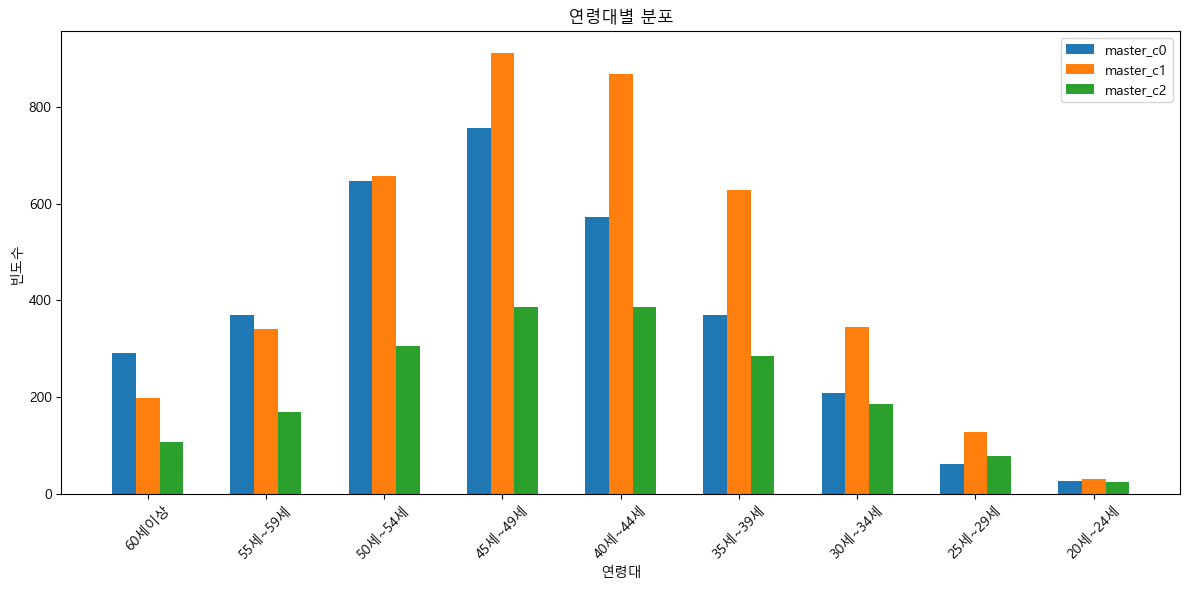

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

age_categories = ['60세이상', '55세~59세', '50세~54세', '45세~49세', '40세~44세', '35세~39세',
                  '30세~34세', '25세~29세', '20세~24세']

# x축 설정
x = np.arange(len(age_categories))

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.bar(x, master_c0.loc[:, '연령대'].value_counts()[age_categories], width=0.2, align='center', label='master_c0')
plt.bar(x + 0.2, master_c1.loc[:, '연령대'].value_counts()[age_categories], width=0.2, align='center', label='master_c1')
plt.bar(x + 0.4, master_c2.loc[:, '연령대'].value_counts()[age_categories], width=0.2, align='center', label='master_c2')

plt.xticks(x + 0.2, age_categories, rotation=45)
plt.xlabel("연령대")
plt.ylabel("빈도수")
plt.title("연령대별 분포")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 연령대별 count 계산
age_counts = master_c0['연령대'].value_counts().reset_index()
age_counts.columns = ['연령대', 'Count']

# 연령대별 비율 계산
age_percentages = round(age_counts['Count'] / age_counts['Count'].sum() * 100, 2)
age_percentages = pd.DataFrame(age_percentages.values, columns=['비율'], index=age_counts.index)

# count와 비율을 하나의 DataFrame으로 합치기
age_data = pd.concat([age_counts, age_percentages], axis=1).set_index('연령대').sort_values(by='연령대')

# 결과 출력
age_data

,Count,비율
연령대,,
20세~24세,27,0.82
25세~29세,62,1.88
30세~34세,210,6.35
35세~39세,370,11.19
40세~44세,572,17.30
45세~49세,757,22.90
50세~54세,646,19.54
55세~59세,371,11.22
60세이상,291,8.80


In [ ]:
# Calculate age_counts and age_percentages for each master_c dataframe
age_data_c0 = pd.concat([master_c0['연령대'].value_counts().reset_index().rename(columns={'index': '연령대', '연령대': 'Count'}),
                         pd.DataFrame(round(master_c0['연령대'].value_counts(normalize=True) * 100, 2).values, columns=['비율'])],
                        axis=1).set_index('연령대').sort_values(by='연령대')

age_data_c1 = pd.concat([master_c1['연령대'].value_counts().reset_index().rename(columns={'index': '연령대', '연령대': 'Count'}),
                         pd.DataFrame(round(master_c1['연령대'].value_counts(normalize=True) * 100, 2).values, columns=['비율'])],
                        axis=1).set_index('연령대').sort_values(by='연령대')

age_data_c2 = pd.concat([master_c2['연령대'].value_counts().reset_index().rename(columns={'index': '연령대', '연령대': 'Count'}),
                         pd.DataFrame(round(master_c2['연령대'].value_counts(normalize=True) * 100, 2).values, columns=['비율'])],
                        axis=1).set_index('연령대').sort_values(by='연령대')

# Combine age_data_c0, age_data_c1, and age_data_c2 into a single DataFrame
combined_age_data = pd.concat([age_data_c0, age_data_c1, age_data_c2], axis=1, keys=['master_c0', 'master_c1', 'master_c2'])

# Result
combined_age_data.sort_index()

master_c0        master_c1        master_c2       
            Count     비율     Count     비율     Count     비율
연령대                                                       
19세이하         NaN    NaN         4   0.10         1   0.05
20세~24세      27.0   0.82        32   0.78        26   1.34
25세~29세      62.0   1.88       128   3.11        79   4.08
30세~34세     210.0   6.35       346   8.41       187   9.66
35세~39세     370.0  11.19       628  15.26       286  14.77
40세~44세     572.0  17.30       868  21.10       387  19.99
45세~49세     757.0  22.90       910  22.12       387  19.99
50세~54세     646.0  19.54       657  15.97       306  15.81
55세~59세     371.0  11.22       342   8.31       170   8.78
60세이상       291.0   8.80       199   4.84       107   5.53

In [ ]:
master_c0.head(2)

,성별,연령대,거주지역,가공1Q,가공2Q,가공3Q,가공4Q,가공5Q,가공6Q,가공7Q,...,TEVE8Q,TMID1Q,TMID2Q,TMID3Q,TMID4Q,TMID5Q,TMID6Q,TMID7Q,TMID8Q,RECENCY
고객번호,,,,,,,,,,,,,,,,,,,,,
7,F,60세이상,36.0,5.971409e+05,4.474150e+05,4.685978e+05,426519.935520,385790.638100,505208.481691,3.459142e+05,...,2.856092e+06,0.0,0.000000,240862.097653,0.000000,94953.973123,0.000000,27399.548262,24948.341200,0
10,F,60세이상,24.0,1.000434e+06,1.075190e+06,1.070681e+06,923334.239846,859027.895536,849546.324238,1.057649e+06,...,6.697111e+05,0.0,9545.577335,86277.860044,10994.675947,17064.924848,12150.745438,11723.648266,7523.181959,0


In [ ]:
import pandas as pd

data = [len(master_c0), len(master_c1), len(master_c2)]
index = ['c0', 'c1', 'c2']

count = pd.DataFrame(data, index=index, columns=['count'])
count

,count
c0,3306
c1,4114
c2,1936


<AxesSubplot:ylabel='count'>

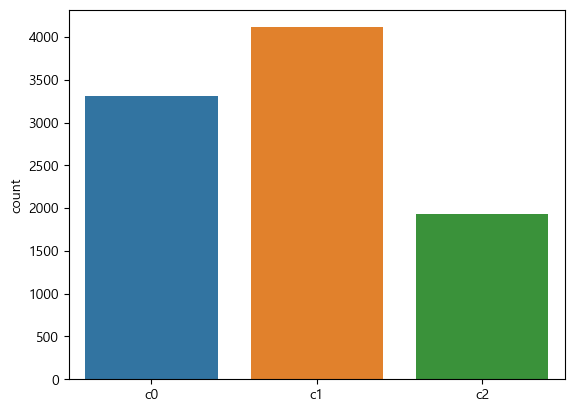

In [ ]:
import seaborn as sns


sns.barplot(count, x=index, y='count')

In [ ]:
import pandas as pd

# 모든 열을 담을 리스트 생성
column_list = []

# master_set의 모든 열을 리스트에 추가
for col in master_c0.columns:
    column_list.append(col)

# 결과 출력
print(column_list)

['성별', '연령대', '거주지역', '가공1Q', '가공2Q', '가공3Q', '가공4Q', '가공5Q', '가공6Q', '가공7Q', '신선1Q', '신선2Q', '신선3Q', '신선4Q', '신선5Q', '신선6Q', '신선7Q', '외식/편의시설1Q', '외식/편의시설2Q', '외식/편의시설3Q', '외식/편의시설4Q', '외식/편의시설5Q', '외식/편의시설6Q', '외식/편의시설7Q', '일상1Q', '일상2Q', '일상3Q', '일상4Q', '일상5Q', '일상6Q', '일상7Q', '의료1Q', '의료2Q', '의료3Q', '의료4Q', '의료5Q', '의료6Q', '의료7Q', '교육/문화1Q', '교육/문화2Q', '교육/문화3Q', '교육/문화4Q', '교육/문화5Q', '교육/문화6Q', '교육/문화7Q', '뷰티1Q', '뷰티2Q', '뷰티3Q', '뷰티4Q', '뷰티5Q', '뷰티6Q', '뷰티7Q', '가전1Q', '가전2Q', '가전3Q', '가전4Q', '가전5Q', '가전6Q', '가전7Q', '가구1Q', '가구2Q', '가구3Q', '가구4Q', '가구5Q', '가구6Q', '가구7Q', '의류1Q', '의류2Q', '의류3Q', '의류4Q', '의류5Q', '의류6Q', '의류7Q', '스포츠1Q', '스포츠2Q', '스포츠3Q', '스포츠4Q', '스포츠5Q', '스포츠6Q', '스포츠7Q', '패션잡화1Q', '패션잡화2Q', '패션잡화3Q', '패션잡화4Q', '패션잡화5Q', '패션잡화6Q', '패션잡화7Q', '유아/아동1Q', '유아/아동2Q', '유아/아동3Q', '유아/아동4Q', '유아/아동5Q', '유아/아동6Q', '유아/아동7Q', '명품1Q', '명품2Q', '명품3Q', '명품4Q', '명품5Q', '명품6Q', '명품7Q', 'A1Q', 'A2Q', 'A3Q', 'A4Q', 'A5Q', 'A6Q', 'A7Q', 'B1Q', 'B2Q', 'B3Q', 'B4Q', 'B5Q', 'B6Q', 'B7Q'

In [ ]:
import pandas as pd

categories = ['가공', '신선', '외식/편의시설', '일상', '의료', '교육/문화', '뷰티', '가전', '가구', '의류', '스포츠',
              '패션잡화','유아/아동', '명품', 'A', 'B', 'C', 'D', 'TOTAL', 'VIS', 'TMOR', 'TLUN', 'TAFT', 'TEVE', 'TMID']

def process_dataframe(df):
    # 주어진 글자가 포함된 컬럼만 추출
    selected_columns = df.filter(regex='|'.join(categories)).columns

    # 선택된 컬럼 이외의 컬럼들 삭제
    df = df[selected_columns]

    # 합산된 컬럼 추가 및 원래 컬럼 삭제
    for category in categories:
        cols = [f'{category}{i}Q' for i in range(1, 8)]
        new_col = f'{category}'
        df[new_col] = df[cols].sum(axis=1)
        df.drop(cols, axis=1, inplace=True)

    return df

# master_c0 처리
master_c0_p = process_dataframe(master_c0)


# master_c1 처리
master_c1_p = process_dataframe(master_c1)


# master_c2 처리
master_c2_p = process_dataframe(master_c2)
master_c2_p.head(2)

,RECENCY,가공건수,신선건수,외식/편의시설건수,일상건수,의료건수,교육/문화건수,뷰티건수,가전건수,가구건수,...,B,C,D,TOTAL,VIS,TMOR,TLUN,TAFT,TEVE,TMID
고객번호,,,,,,,,,,,,,,,,,,,,,
15,0,337,370,0,74,1,1,22,0,1,...,4.274524e+06,409401.028310,0.0,2.408351e+07,649,5.989812e+03,1.323612e+06,1.985772e+07,2.896198e+06,0.0
18,1,238,177,0,55,9,0,41,2,0,...,2.919298e+05,306373.364452,0.0,8.053496e+07,460,1.243254e+07,1.540662e+07,4.429624e+07,8.399571e+06,0.0


In [ ]:
master_c0_p.columns

Index(['RECENCY', '가공건수', '신선건수', '외식/편의시설건수', '일상건수', '의료건수', '교육/문화건수',
       '뷰티건수', '가전건수', '가구건수', '의류건수', '스포츠건수', '유아/아동건수', '명품건수', '가공', '신선',
       '외식/편의시설', '일상', '의료', '교육/문화', '뷰티', '가전', '가구', '의류', '스포츠', '패션잡화',
       '유아/아동', '명품', 'A', 'B', 'C', 'D', 'TOTAL', 'VIS', 'TMOR', 'TLUN',
       'TAFT', 'TEVE', 'TMID'],
      dtype='object')

In [ ]:
master_c0_p.TOTAL.sum()

123207949885.35077

In [ ]:
master_c1_p.TOTAL.sum()

121825481640.6046

In [ ]:
master_c2_p.TOTAL.sum()

68440876778.75146

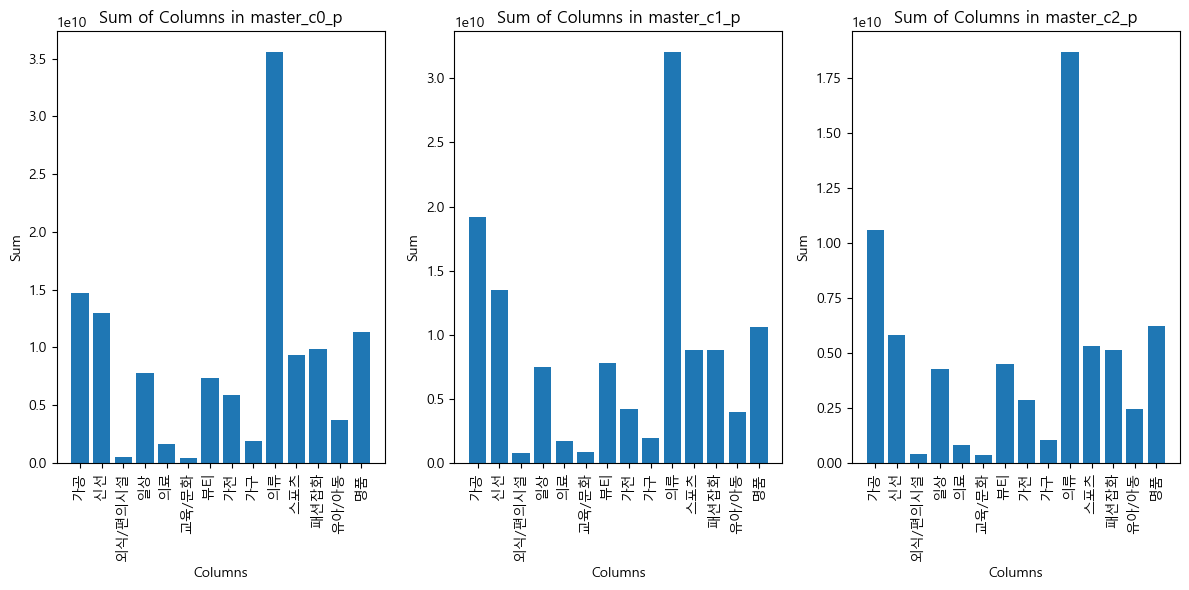

In [ ]:
import matplotlib.pyplot as plt

categories = ['가공', '신선', '외식/편의시설', '일상', '의료', '교육/문화', '뷰티', '가전', '가구', '의류', '스포츠', '패션잡화', '유아/아동', '명품']
sum_c0 = []  # master_c0_p에 대한 각 컬럼의 합계를 저장할 리스트
sum_c1 = []  # master_c1_p에 대한 각 컬럼의 합계를 저장할 리스트
sum_c2 = []  # master_c2_p에 대한 각 컬럼의 합계를 저장할 리스트

for column in categories:
    sum_c0.append(master_c0_p[column].sum())
    sum_c1.append(master_c1_p[column].sum())
    sum_c2.append(master_c2_p[column].sum())

# 그래프 그리기
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.bar(categories, sum_c0)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum of Columns in master_c0_p')
plt.xticks(rotation=90)

plt.subplot(132)
plt.bar(categories, sum_c1)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum of Columns in master_c1_p')
plt.xticks(rotation=90)

plt.subplot(133)
plt.bar(categories, sum_c2)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Sum of Columns in master_c2_p')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


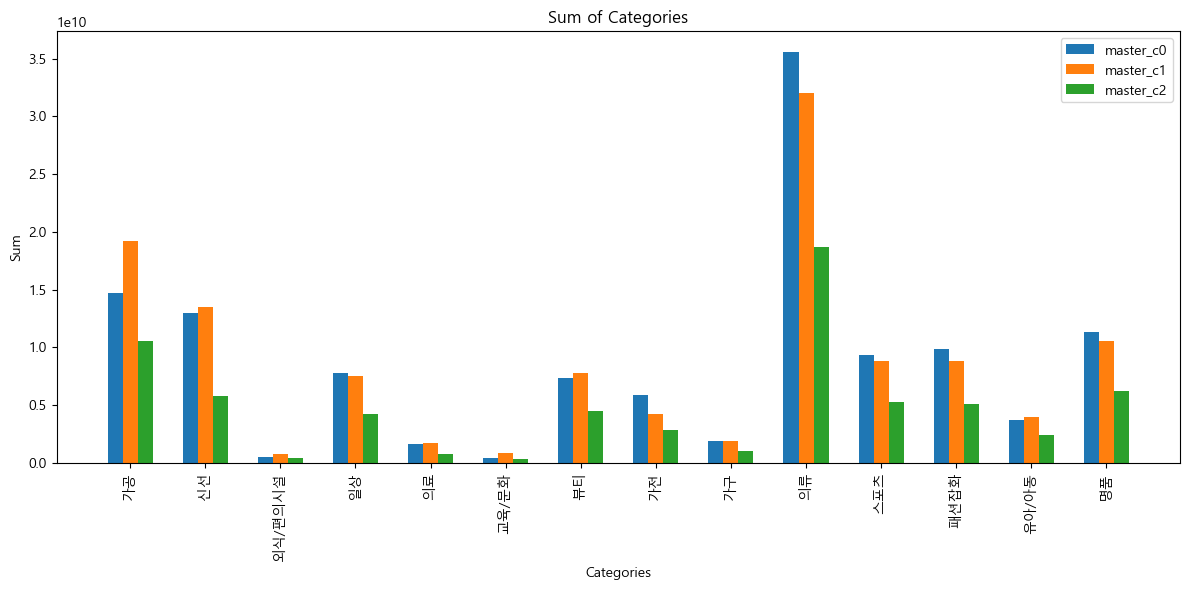

In [ ]:
import matplotlib.pyplot as plt

categories = ['가공', '신선', '외식/편의시설', '일상', '의료', '교육/문화', '뷰티', '가전', '가구', '의류', '스포츠', '패션잡화', '유아/아동', '명품']
sum_c0 = []  # master_c0_p에 대한 각 컬럼의 합계를 저장할 리스트
sum_c1 = []  # master_c1_p에 대한 각 컬럼의 합계를 저장할 리스트
sum_c2 = []  # master_c2_p에 대한 각 컬럼의 합계를 저장할 리스트

for column in categories:
    sum_c0.append(master_c0_p[column].sum())
    sum_c1.append(master_c1_p[column].sum())
    sum_c2.append(master_c2_p[column].sum())

bar_width = 0.2  # 바의 너비
index = np.arange(len(categories))  # x축 인덱스

plt.figure(figsize=(12, 6))

plt.bar(index, sum_c0, bar_width, label='master_c0')
plt.bar(index + bar_width, sum_c1, bar_width, label='master_c1')
plt.bar(index + (2 * bar_width), sum_c2, bar_width, label='master_c2')

plt.xlabel('Categories')
plt.ylabel('Sum')
plt.title('Sum of Categories')
plt.xticks(index + bar_width, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

categories = ['A', 'B', 'C', 'D']

def process_dataframe(df):
    # 주어진 글자가 포함된 컬럼만 추출
    selected_columns = df.filter(regex='|'.join(categories)).columns

    # 선택된 컬럼 이외의 컬럼들 삭제
    df = df[selected_columns]

    # 합산된 컬럼 추가 및 원래 컬럼 삭제
    for category in categories:
        cols = [f'{category}{i}Q' for i in range(1, 8)]
        new_col = f'{category}_Sum'
        df[new_col] = df[cols].sum(axis=1)
        df.drop(cols, axis=1, inplace=True)

    return df

# master_c0 처리
master_c0_a = process_dataframe(master_c0)

# master_c1 처리
master_c1_a = process_dataframe(master_c1)

# master_c2 처리
master_c2_a = process_dataframe(master_c2)
master_c2_a.head(5)

,TOTAL1Q,TOTAL2Q,TOTAL3Q,TOTAL4Q,TOTAL5Q,TOTAL6Q,TOTAL7Q,TAFT1Q,TAFT2Q,TAFT3Q,...,TMID3Q,TMID4Q,TMID5Q,TMID6Q,TMID7Q,RECENCY,A_Sum,B_Sum,C_Sum,D_Sum
고객번호,,,,,,,,,,,,,,,,,,,,,
15,4.084907e+06,5.608592e+06,2.879803e+06,1.274519e+06,3.155693e+06,5.296480e+06,1.783521e+06,3.831437e+06,4.373852e+06,2.012349e+06,...,0.000000,0.0,0.0,0.00000,0.000000,0,1.939959e+07,4.274524e+06,409401.028310,0.000000
18,4.152677e+07,2.148058e+07,1.235556e+07,8.514347e+05,1.760164e+06,1.059398e+06,1.501062e+06,2.381351e+07,1.199362e+07,4.915367e+06,...,0.000000,0.0,0.0,0.00000,0.000000,1,7.993666e+07,2.919298e+05,306373.364452,0.000000
22,1.180761e+07,3.195192e+07,1.140037e+07,2.822558e+07,3.026770e+07,7.603772e+06,2.636285e+06,1.132171e+07,1.130702e+07,1.086357e+07,...,0.000000,0.0,0.0,0.00000,0.000000,1,1.238932e+08,0.000000e+00,0.000000,0.000000
47,3.416945e+06,3.743324e+06,5.333365e+06,1.825337e+06,2.179308e+06,1.681453e+06,1.162286e+06,1.767788e+06,1.276257e+06,1.907228e+06,...,0.000000,0.0,0.0,0.00000,0.000000,0,7.374132e+06,1.196279e+07,5096.313917,0.000000
51,4.318834e+06,3.019040e+06,2.270160e+06,4.603982e+06,2.297343e+06,1.798761e+06,1.418444e+06,1.800271e+06,1.240165e+06,9.243692e+05,...,111967.496288,0.0,0.0,1005.85641,3071.698236,0,1.403478e+07,5.640312e+06,0.000000,51474.149213


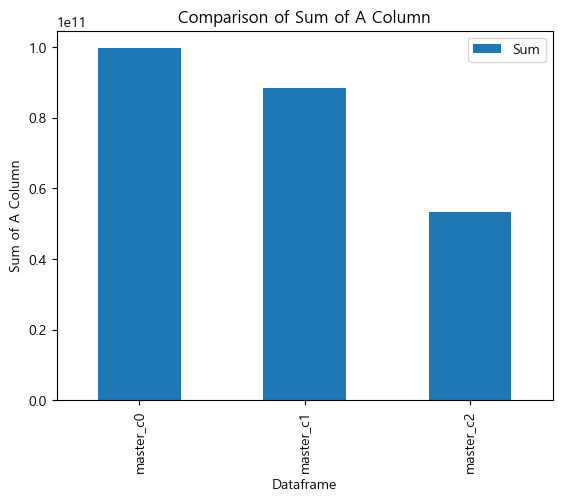

In [ ]:
# 각 데이터프레임의 A 컬럼 합계 계산
sum_c0 = master_c0_a['A_Sum'].sum()
sum_c1 = master_c1_a['A_Sum'].sum()
sum_c2 = master_c2_a['A_Sum'].sum()

# 바 그래프 생성
df = pd.DataFrame({'Dataframe': ['master_c0', 'master_c1', 'master_c2'],
                   'Sum': [sum_c0, sum_c1, sum_c2]})
df.plot(x='Dataframe', y='Sum', kind='bar')

# 그래프 출력
plt.title('Comparison of Sum of A Column')
plt.xlabel('Dataframe')
plt.ylabel('Sum of A Column')
plt.show()

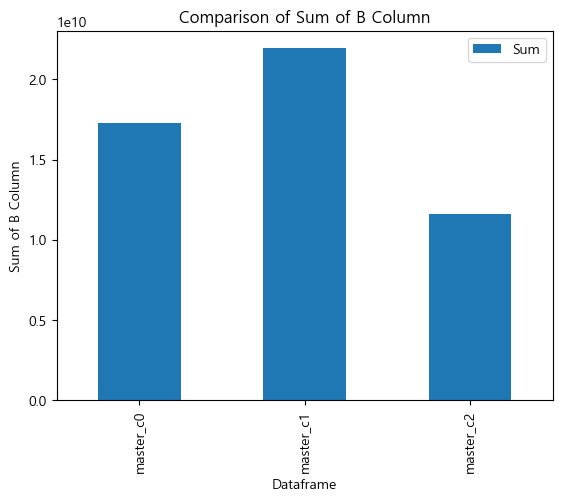

In [ ]:
# 각 데이터프레임의 A 컬럼 합계 계산
sum_c0 = master_c0_a['B_Sum'].sum()
sum_c1 = master_c1_a['B_Sum'].sum()
sum_c2 = master_c2_a['B_Sum'].sum()

# 바 그래프 생성
df = pd.DataFrame({'Dataframe': ['master_c0', 'master_c1', 'master_c2'],
                   'Sum': [sum_c0, sum_c1, sum_c2]})
df.plot(x='Dataframe', y='Sum', kind='bar')

# 그래프 출력
plt.title('Comparison of Sum of B Column')
plt.xlabel('Dataframe')
plt.ylabel('Sum of B Column')
plt.show()

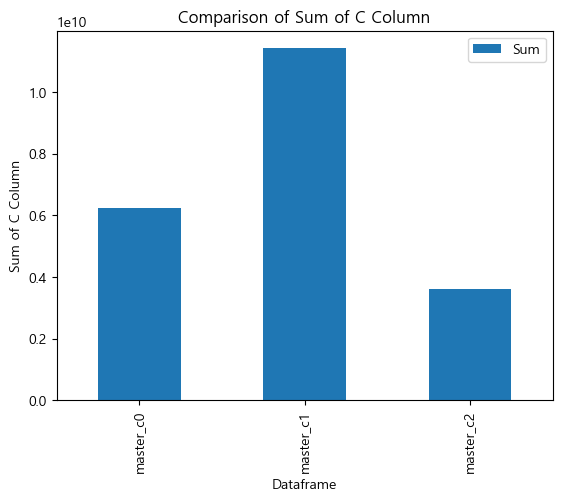

In [ ]:
# 각 데이터프레임의 A 컬럼 합계 계산
sum_c0 = master_c0_a['C_Sum'].sum()
sum_c1 = master_c1_a['C_Sum'].sum()
sum_c2 = master_c2_a['C_Sum'].sum()

# 바 그래프 생성
df = pd.DataFrame({'Dataframe': ['master_c0', 'master_c1', 'master_c2'],
                   'Sum': [sum_c0, sum_c1, sum_c2]})
df.plot(x='Dataframe', y='Sum', kind='bar')

# 그래프 출력
plt.title('Comparison of Sum of C Column')
plt.xlabel('Dataframe')
plt.ylabel('Sum of C Column')
plt.show()

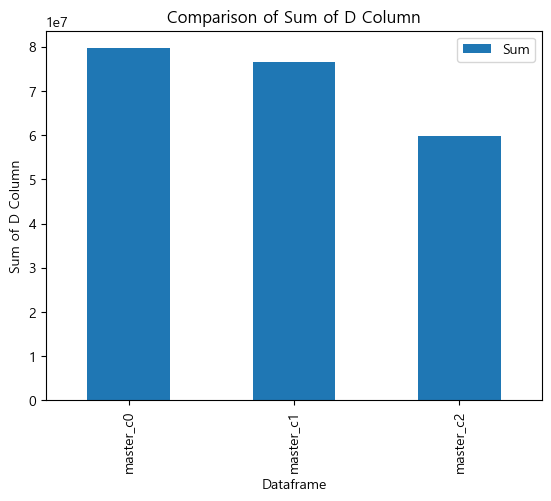

In [ ]:
# 각 데이터프레임의 A 컬럼 합계 계산
sum_c0 = master_c0_a['D_Sum'].sum()
sum_c1 = master_c1_a['D_Sum'].sum()
sum_c2 = master_c2_a['D_Sum'].sum()

# 바 그래프 생성
df = pd.DataFrame({'Dataframe': ['master_c0', 'master_c1', 'master_c2'],
                   'Sum': [sum_c0, sum_c1, sum_c2]})
df.plot(x='Dataframe', y='Sum', kind='bar')

# 그래프 출력
plt.title('Comparison of Sum of D Column')
plt.xlabel('Dataframe')
plt.ylabel('Sum of D Column')
plt.show()

In [ ]:
# 분기별 컬럼들 합계 컬럼 구해주는 코드

categories = ['가공', '신선', '외식/편의시설', '일상', '의료', '교육/문화', '뷰티', '가전', '가구', '의류', '스포츠', '패션잡화', '유아/아동', '명품']

quarters = ['1Q', '2Q', '3Q', '4Q', '5Q', '6Q', '7Q']

for category in categories:
    sum_column_name = f'{category}_sum'
    column_names = [f'{category}{quarter}' for quarter in quarters]
    master_c0[sum_column_name] = master_c0[column_names].sum(axis=1)
    master_c1[sum_column_name] = master_c1[column_names].sum(axis=1)
    master_c2[sum_column_name] = master_c2[column_names].sum(axis=1)


59822786736.4753

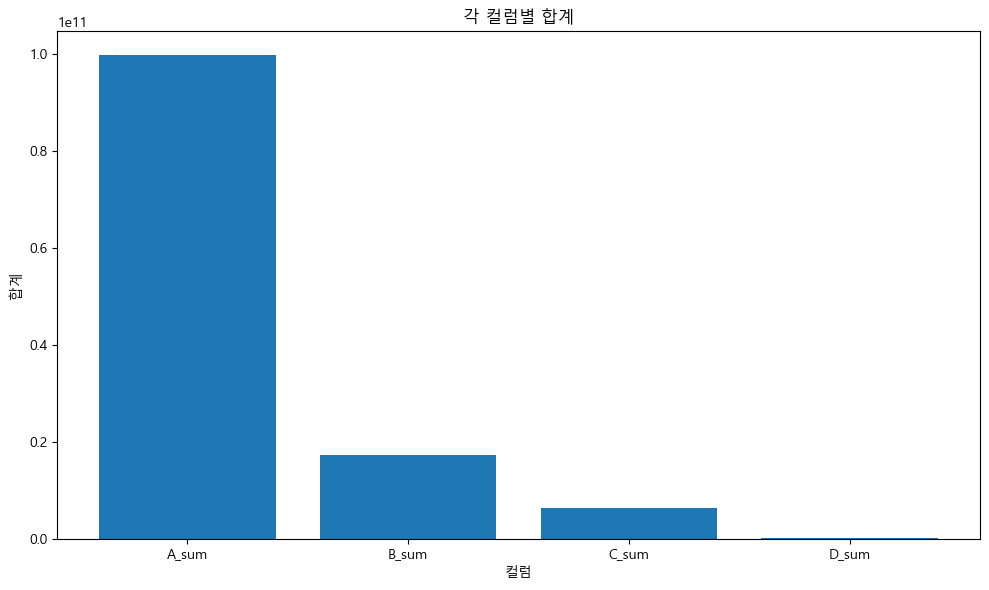

In [ ]:
import matplotlib.pyplot as plt

# A_sum, B_sum, C_sum, D_sum 컬럼의 합계 계산
sum_values = master_c0_a[['A_sum', 'B_sum', 'C_sum', 'D_sum']].sum()

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(sum_values.index, sum_values.values)
plt.xlabel("컬럼")
plt.ylabel("합계")
plt.title("각 컬럼별 합계")
plt.tight_layout()
plt.show()


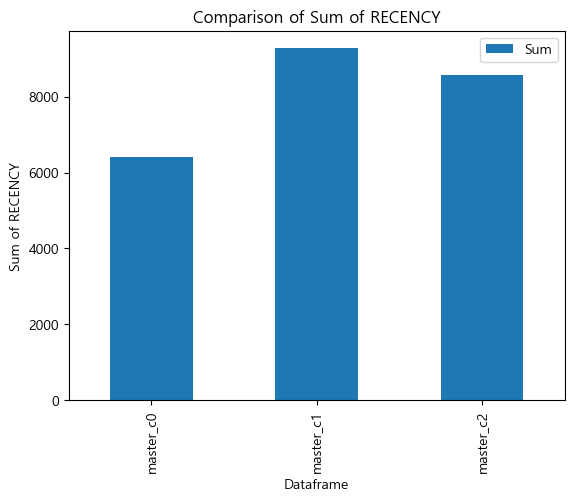

In [ ]:
# 각 데이터프레임의 A 컬럼 합계 계산
sum_c0 = master_c0['RECENCY'].sum()
sum_c1 = master_c1['RECENCY'].sum()
sum_c2 = master_c2['RECENCY'].sum()

# 바 그래프 생성
df = pd.DataFrame({'Dataframe': ['master_c0', 'master_c1', 'master_c2'],
                   'Sum': [sum_c0, sum_c1, sum_c2]})
df.plot(x='Dataframe', y='Sum', kind='bar')

# 그래프 출력
plt.title('Comparison of Sum of RECENCY')
plt.xlabel('Dataframe')
plt.ylabel('Sum of RECENCY')
plt.show()

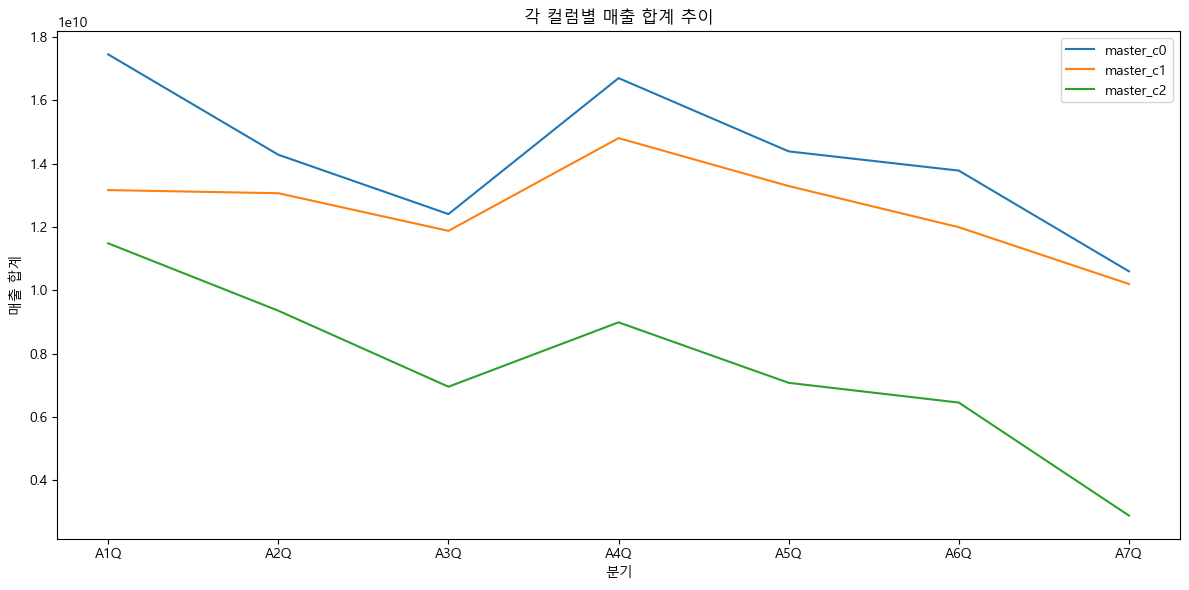

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['A1Q', 'A2Q', 'A3Q', 'A4Q', 'A5Q', 'A6Q', 'A7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.tight_layout()
plt.show()


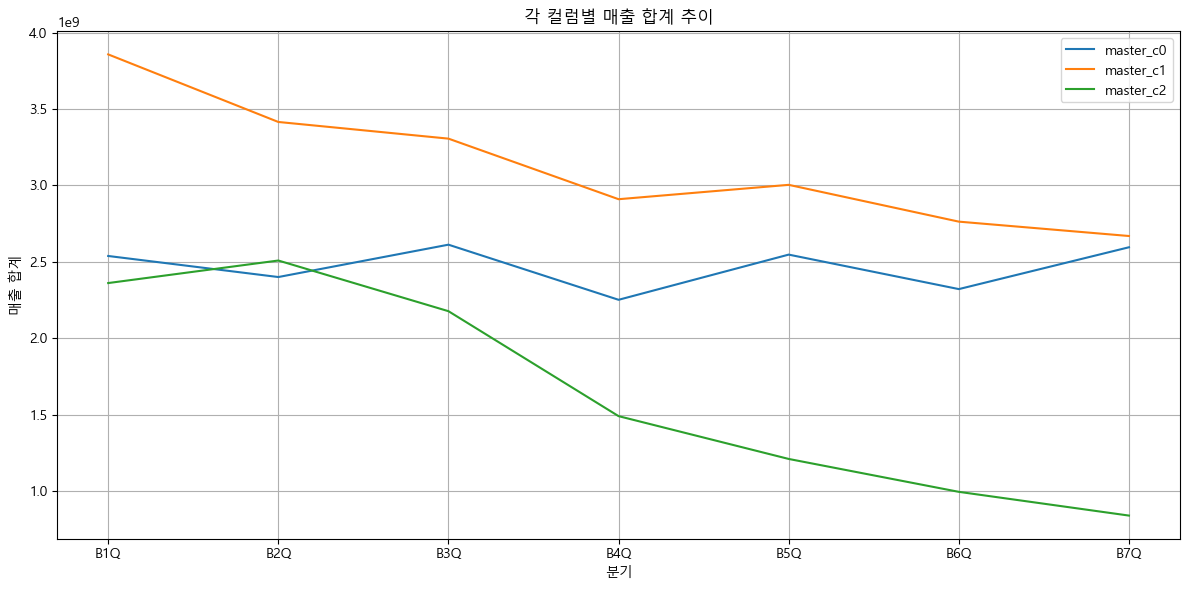

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['B1Q', 'B2Q', 'B3Q', 'B4Q', 'B5Q', 'B6Q', 'B7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


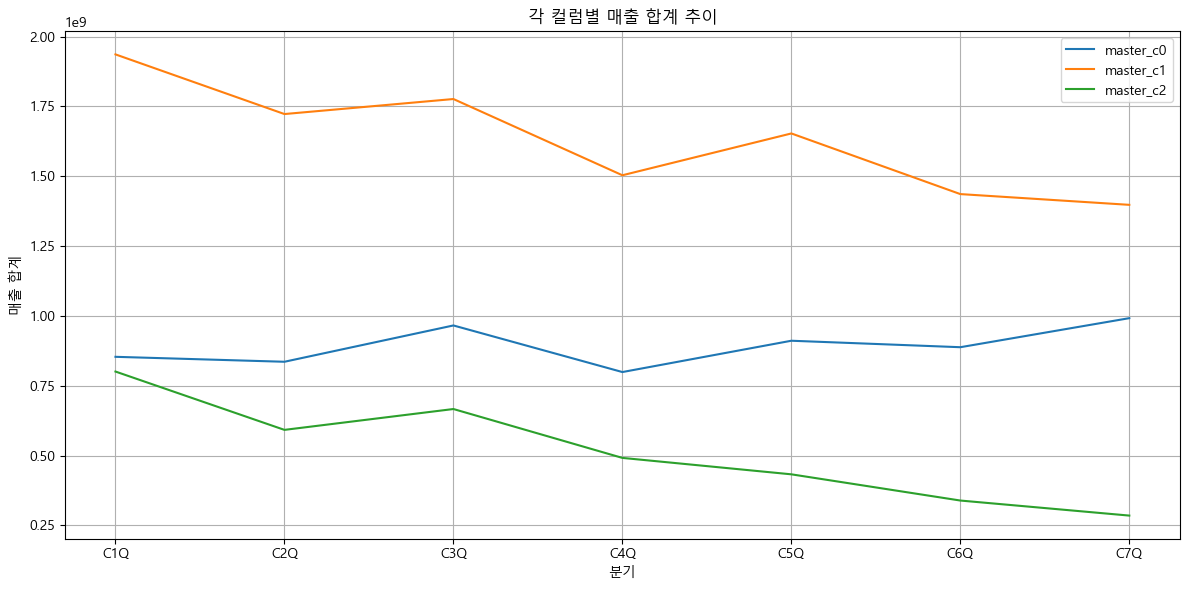

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['C1Q', 'C2Q', 'C3Q', 'C4Q', 'C5Q', 'C6Q', 'C7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


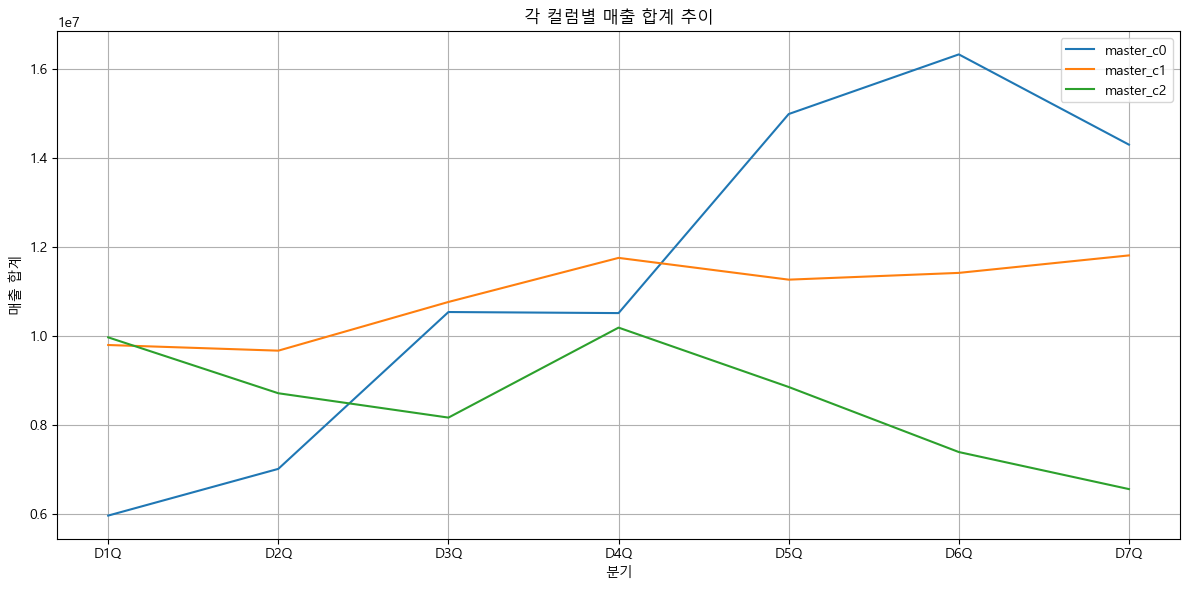

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['D1Q', 'D2Q', 'D3Q', 'D4Q', 'D5Q', 'D6Q', 'D7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


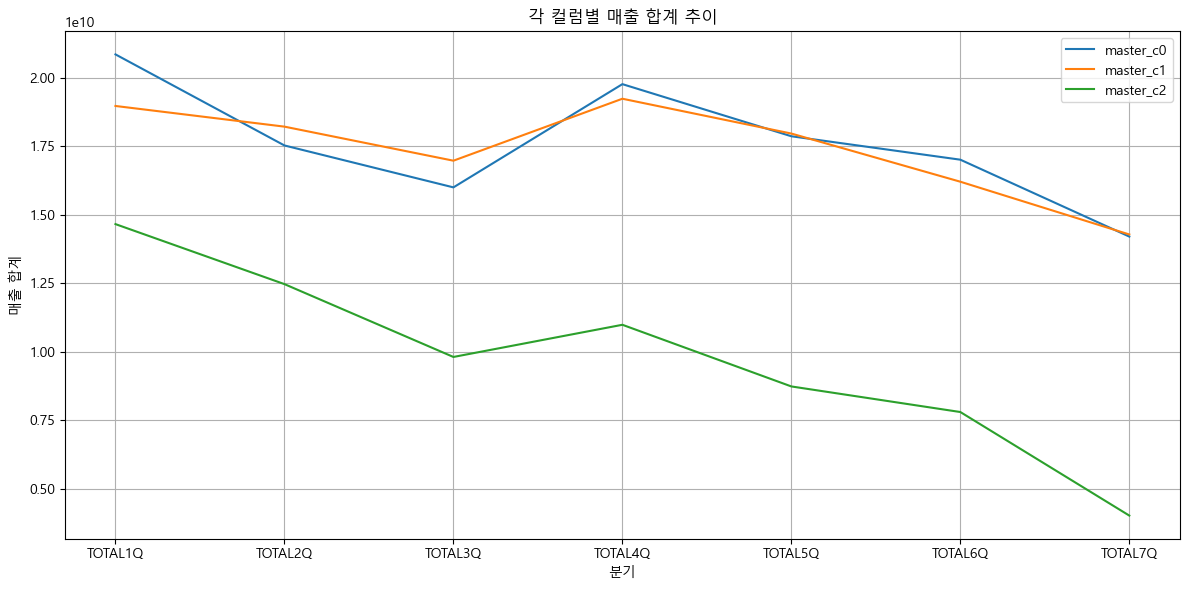

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['TOTAL1Q', 'TOTAL2Q', 'TOTAL3Q', 'TOTAL4Q', 'TOTAL5Q', 'TOTAL6Q', 'TOTAL7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


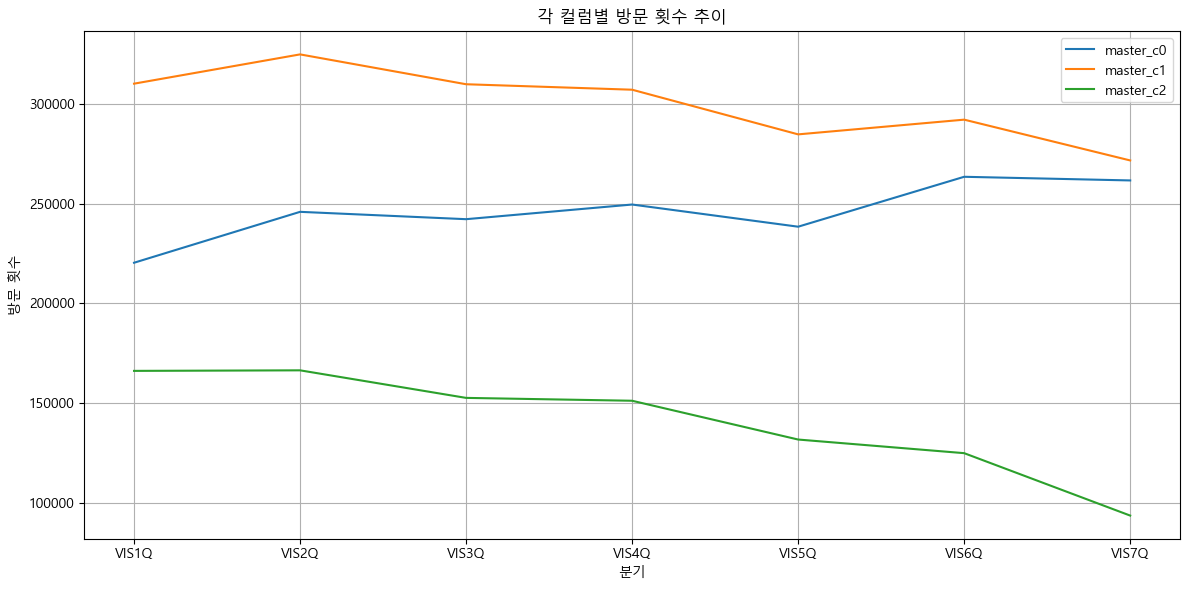

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['VIS1Q', 'VIS2Q', 'VIS3Q', 'VIS4Q', 'VIS5Q', 'VIS6Q', 'VIS7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("방문 횟수")
plt.title("각 컬럼별 방문 횟수 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


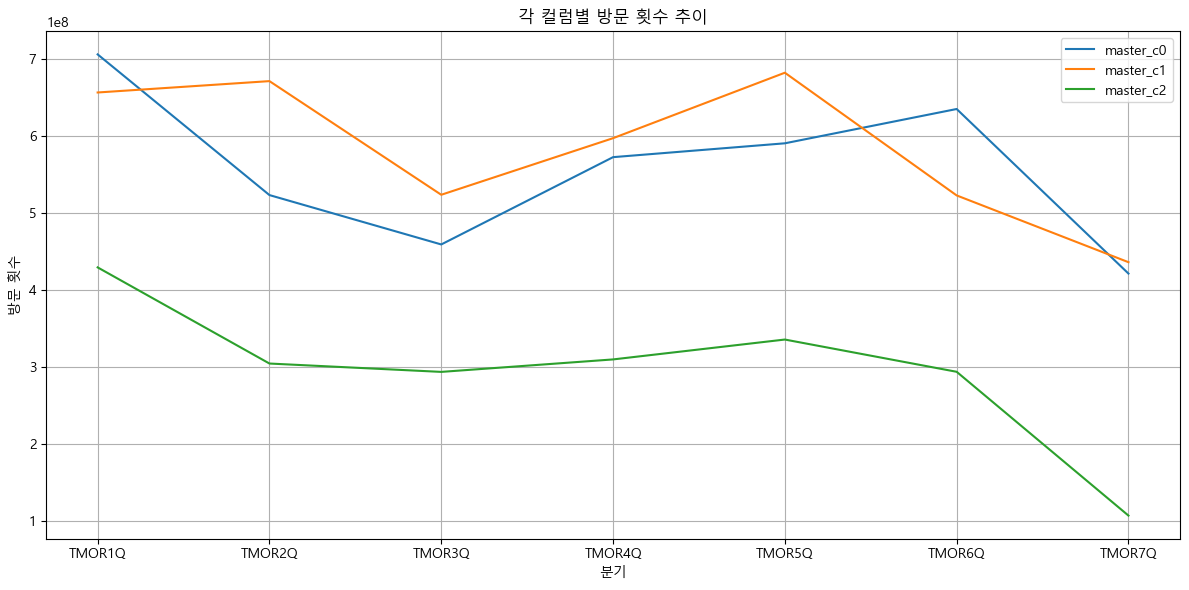

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['TMOR1Q', 'TMOR2Q', 'TMOR3Q', 'TMOR4Q', 'TMOR5Q', 'TMOR6Q', 'TMOR7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("방문 횟수")
plt.title("각 컬럼별 방문 횟수 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


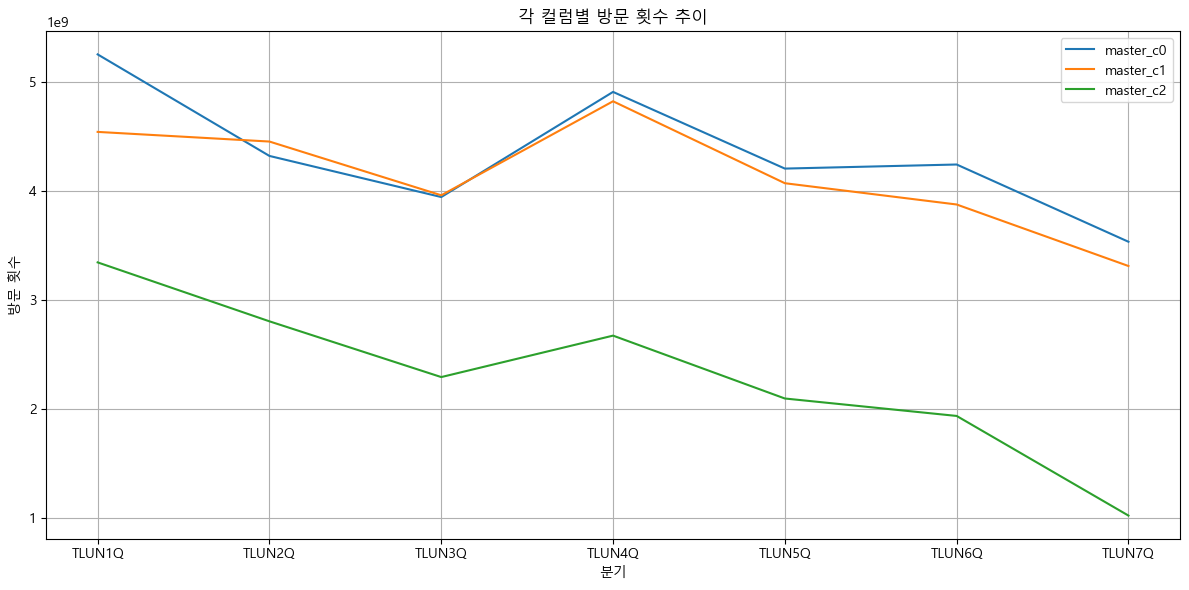

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['TLUN1Q', 'TLUN2Q', 'TLUN3Q', 'TLUN4Q', 'TLUN5Q', 'TLUN6Q', 'TLUN7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("방문 횟수")
plt.title("각 컬럼별 방문 횟수 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


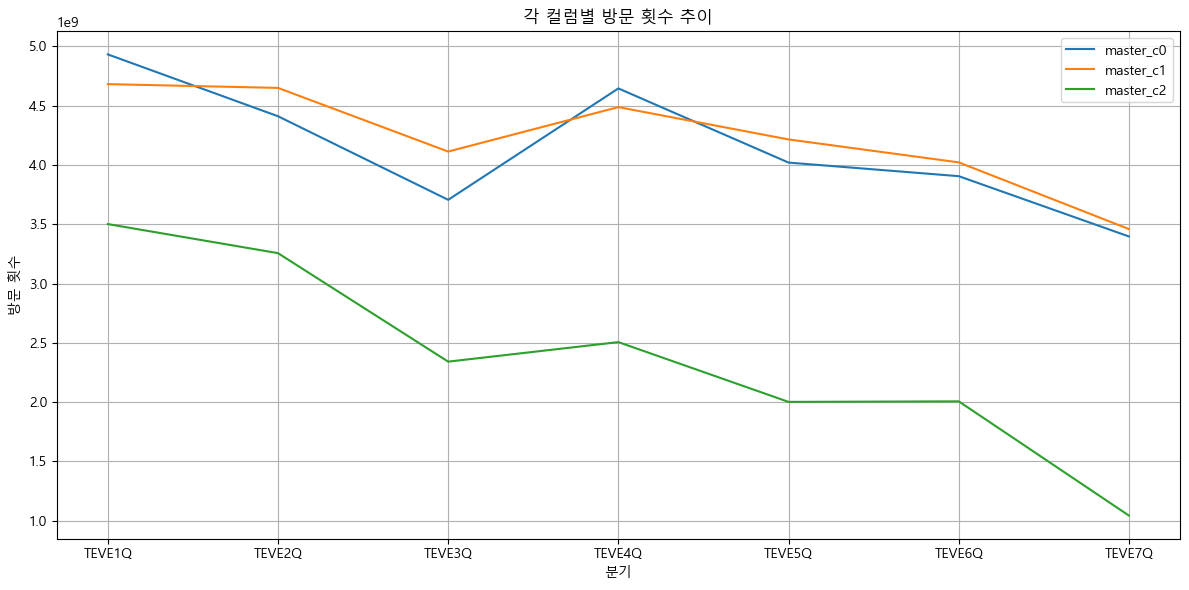

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['TEVE1Q', 'TEVE2Q', 'TEVE3Q', 'TEVE4Q', 'TEVE5Q', 'TEVE6Q', 'TEVE7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("방문 횟수")
plt.title("각 컬럼별 방문 횟수 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


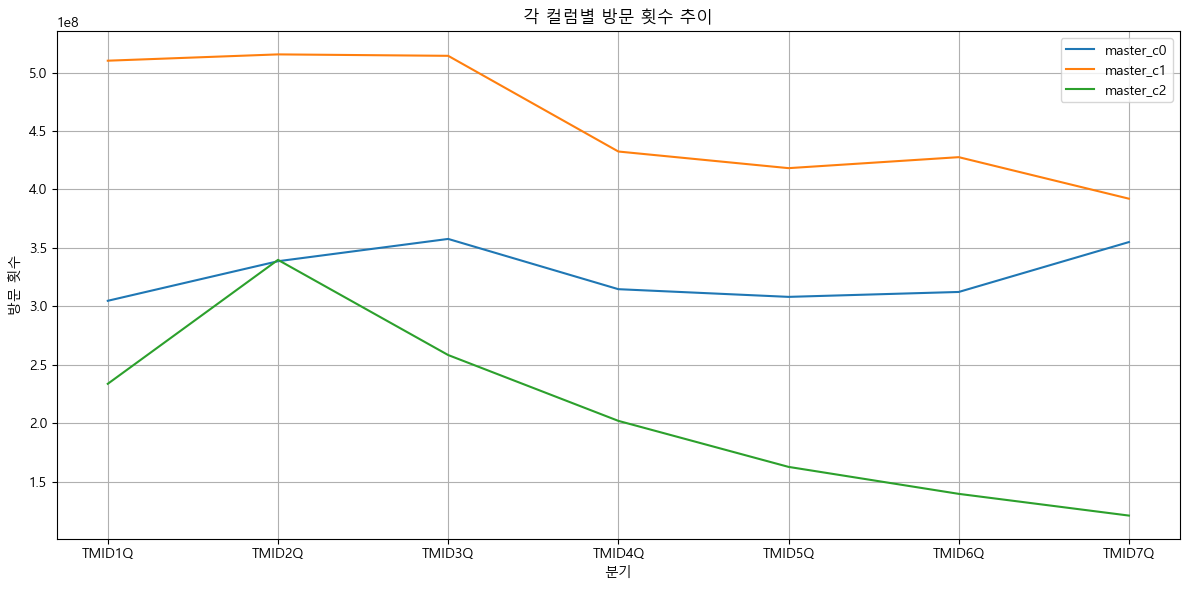

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['TMID1Q', 'TMID2Q', 'TMID3Q', 'TMID4Q', 'TMID5Q', 'TMID6Q', 'TMID7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("방문 횟수")
plt.title("각 컬럼별 방문 횟수 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


In [ ]:
master_c2_p.TMOR.sum()
master_c2_p.TLUN.sum()
master_c2_p.TAFT.sum()
master_c2_p.TEVE.sum()
master_c2_p.TMID.sum()

2070957214.6017442

In [ ]:
dataframes = [master_c0_p, master_c1_p, master_c2_p]

for df in dataframes:
    A_Sum = df.A.sum()
    B_Sum = df.B.sum()
    C_Sum = df.C.sum()
    D_Sum = df.D.sum()


79666461.8245857

In [ ]:
import pandas as pd

dataframes = [master_c0_p, master_c1_p, master_c2_p]
columns = ['A', 'B', 'C', 'D']

# 새로운 DataFrame을 생성하기 위해 빈 리스트를 초기화합니다.
combined_df = pd.DataFrame()

for df in dataframes:
    sum_values = [df[column].sum() for column in columns]
    temp_df = pd.DataFrame([sum_values], columns=columns)
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# 결과 확인
print(combined_df)


              A             B             C             D
0  9.960989e+10  1.727311e+10  6.245279e+09  7.966646e+07
1  8.839694e+10  2.192658e+10  1.142546e+10  7.650602e+07
2  5.317953e+10  1.159300e+10  3.608460e+09  5.988375e+07


16652238910.55035

1456797054.046856

In [ ]:
master_c2.성별.value_counts()

F    1597
M     339
Name: 성별, dtype: int64

In [ ]:
master_c0_p

,RECENCY,가공건수,신선건수,외식/편의시설건수,일상건수,의료건수,교육/문화건수,뷰티건수,가전건수,가구건수,...,A,B,C,D,TOTAL,VIS,TMOR,TLUN,TAFT,TMID
고객번호,,,,,,,,,,,,,,,,,,,,,
7,0,312,137,0,68,2,11,10,3,6,...,5.678179e+07,1.728689e+06,2.034744e+05,0.000000,5.871396e+07,454,1.040976e+06,1.738694e+07,2.251622e+07,363215.619039
10,0,1625,1064,0,328,0,3,26,0,2,...,4.052695e+06,2.265998e+06,1.058461e+07,24140.553850,1.692744e+07,696,2.294692e+05,1.738053e+06,7.206069e+06,147757.431878
14,0,521,387,7,102,3,0,10,4,7,...,2.784578e+07,2.092717e+06,2.361247e+06,0.000000,3.229975e+07,629,1.068447e+05,1.435665e+07,1.319035e+07,0.000000
17,6,341,174,1,71,6,0,21,4,0,...,1.126424e+08,2.377450e+06,6.579751e+05,0.000000,1.156778e+08,406,1.709030e+06,2.683013e+07,7.794817e+07,0.000000
27,5,216,196,0,8,36,0,37,0,0,...,5.729369e+07,1.650945e+05,2.108210e+04,0.000000,5.747986e+07,498,2.373813e+05,1.182196e+07,2.663651e+07,23217.429155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19304,8,256,233,0,32,10,18,46,2,0,...,8.395489e+07,0.000000e+00,1.001947e+05,0.000000,8.405508e+07,535,4.153747e+06,2.832056e+07,4.622200e+07,0.000000
19310,1,202,14,0,16,1,1,59,3,0,...,2.962717e+07,2.149066e+04,9.890198e+03,961602.907522,3.062016e+07,390,1.526765e+05,8.457264e+06,8.164268e+06,0.000000
19314,1,108,76,0,44,2,0,27,14,1,...,2.295473e+08,0.000000e+00,0.000000e+00,0.000000,2.295473e+08,464,4.481524e+06,4.994441e+07,1.361489e+08,0.000000


In [ ]:
master_c0_p.TMID.sum()

2290969442.6339083

In [ ]:
['성별', '연령대', '거주지역', '가공1Q', '가공2Q', '가공3Q', '가공4Q', '가공5Q', '가공6Q', '가공7Q', '신선1Q', '신선2Q', '신선3Q', '신선4Q', '신선5Q', '신선6Q', '신선7Q', '외식/편의시설1Q', '외식/편의시설2Q', '외식/편의시설3Q', '외식/편의시설4Q', '외식/편의시설5Q', '외식/편의시설6Q', '외식/편의시설7Q', '일상1Q', '일상2Q', '일상3Q', '일상4Q', '일상5Q', '일상6Q', '일상7Q', '의료1Q', '의료2Q', '의료3Q', '의료4Q', '의료5Q', '의료6Q', '의료7Q', '교육/문화1Q', '교육/문화2Q', '교육/문화3Q', '교육/문화4Q', '교육/문화5Q', '교육/문화6Q', '교육/문화7Q', '뷰티1Q', '뷰티2Q', '뷰티3Q', '뷰티4Q', '뷰티5Q', '뷰티6Q', '뷰티7Q', '가전1Q', '가전2Q', '가전3Q', '가전4Q', '가전5Q', '가전6Q', '가전7Q', '가구1Q', '가구2Q', '가구3Q', '가구4Q', '가구5Q', '가구6Q', '가구7Q', '의류1Q', '의류2Q', '의류3Q', '의류4Q', '의류5Q', '의류6Q', '의류7Q', '스포츠1Q', '스포츠2Q', '스포츠3Q', '스포츠4Q', '스포츠5Q', '스포츠6Q', '스포츠7Q', '패션잡화1Q', '패션잡화2Q', '패션잡화3Q', '패션잡화4Q', '패션잡화5Q', '패션잡화6Q', '패션잡화7Q', '유아/아동1Q', '유아/아동2Q', '유아/아동3Q', '유아/아동4Q', '유아/아동5Q', '유아/아동6Q', '유아/아동7Q', '명품1Q', '명품2Q', '명품3Q', '명품4Q', '명품5Q', '명품6Q', '명품7Q', 'A1Q', 'A2Q', 'A3Q', 'A4Q', 'A5Q', 'A6Q', 'A7Q', 'B1Q', 'B2Q', 'B3Q', 'B4Q', 'B5Q', 'B6Q', 'B7Q', 'C1Q', 'C2Q', 'C3Q', 'C4Q', 'C5Q', 'C6Q', 'C7Q', 'D1Q', 'D2Q', 'D3Q', 'D4Q', 'D5Q', 'D6Q', 'D7Q', 'TOTAL1Q', 'TOTAL2Q', 'TOTAL3Q', 'TOTAL4Q', 'TOTAL5Q', 'TOTAL6Q', 'TOTAL7Q', 'VIS1Q', 'VIS2Q', 'VIS3Q', 'VIS4Q', 'VIS5Q', 'VIS6Q', 'VIS7Q', 'TMOR1Q', 'TMOR2Q', 'TMOR3Q', 'TMOR4Q', 'TMOR5Q', 'TMOR6Q', 'TMOR7Q', 'TLUN1Q', 'TLUN2Q', 'TLUN3Q', 'TLUN4Q', 'TLUN5Q', 'TLUN6Q', 'TLUN7Q', 'TAFT1Q', 'TAFT2Q', 'TAFT3Q', 'TAFT4Q', 'TAFT5Q', 'TAFT6Q', 'TAFT7Q', 'TEVE1Q', 'TEVE2Q', 'TEVE3Q', 'TEVE4Q', 'TEVE5Q', 'TEVE6Q', 'TEVE7Q', 'TMID1Q', 'TMID2Q', 'TMID3Q', 'TMID4Q', 'TMID5Q', 'TMID6Q', 'TMID7Q', 'RECENCY']

In [ ]:
import matplotlib.pyplot as plt

# 공통 컬럼 선택
columns = ['TOTAL1Q', 'TOTAL2Q', 'TOTAL3Q', 'TOTAL4Q', 'TOTAL5Q', 'TOTAL6Q', 'TOTAL7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


In [ ]:
master_c0_a

,TOTAL1Q,TOTAL2Q,TOTAL3Q,TOTAL4Q,TOTAL5Q,TOTAL6Q,TOTAL7Q,TOTAL8Q,TAFT1Q,TAFT2Q,...,TMID8Q,RECENCY,A_sum,B_sum,C_sum,D_sum,A,B,C,D
고객번호,,,,,,,,,,,,,,,,,,,,,
7,1.075239e+07,2.858968e+06,4.824173e+06,1.568624e+07,9.234960e+06,1.195804e+07,3.399177e+06,1.447744e+07,4.130389e+06,1.056753e+06,...,24948.341200,0,7.112329e+07,1.728689e+06,3.394139e+05,0.000000e+00,7.112329e+07,1.728689e+06,3.394139e+05,0.000000e+00
10,2.572955e+06,2.600997e+06,2.306778e+06,1.906895e+06,2.906085e+06,2.407853e+06,2.225881e+06,1.694867e+06,8.390908e+05,1.024713e+06,...,7523.181959,0,4.269881e+06,2.597703e+06,1.173059e+07,2.414055e+04,4.269881e+06,2.597703e+06,1.173059e+07,2.414055e+04
14,4.195729e+06,5.385205e+06,4.873409e+06,3.173582e+06,6.150723e+06,5.368753e+06,3.152348e+06,2.438476e+06,1.232789e+06,3.021525e+06,...,0.000000,0,2.997782e+07,2.207354e+06,2.553048e+06,0.000000e+00,2.997782e+07,2.207354e+06,2.553048e+06,0.000000e+00
17,2.564555e+07,2.477531e+07,5.561013e+06,1.417445e+07,4.354639e+06,2.079686e+07,2.037000e+07,2.693368e+07,2.426625e+07,1.239033e+07,...,0.000000,6,1.380049e+08,3.948584e+06,6.579751e+05,0.000000e+00,1.380049e+08,3.948584e+06,6.579751e+05,0.000000e+00
27,1.429773e+07,6.490918e+06,4.603052e+06,3.298548e+06,7.975921e+06,5.794628e+06,1.501907e+07,3.132525e+06,7.833357e+06,1.383395e+06,...,0.000000,5,6.035044e+07,2.254347e+05,3.651526e+04,0.000000e+00,6.035044e+07,2.254347e+05,3.651526e+04,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19304,1.440932e+07,1.410920e+07,1.254176e+07,1.209173e+06,2.082962e+07,8.661037e+06,1.229497e+07,4.751054e+06,4.575068e+06,7.625297e+06,...,0.000000,8,8.870594e+07,0.000000e+00,1.001947e+05,0.000000e+00,8.870594e+07,0.000000e+00,1.001947e+05,0.000000e+00
19310,3.532753e+06,1.540308e+07,4.236640e+06,4.041196e+06,3.959204e+05,5.448523e+05,2.465714e+06,3.013044e+06,1.673232e+06,1.781925e+06,...,17086.712752,1,3.249773e+07,3.951535e+04,8.941545e+04,1.006539e+06,3.249773e+07,3.951535e+04,8.941545e+04,1.006539e+06
19314,5.746017e+07,2.085753e+07,1.397534e+07,2.981245e+07,4.160927e+07,3.870715e+07,2.712542e+07,3.604224e+07,2.509214e+07,8.380212e+06,...,0.000000,1,2.655896e+08,0.000000e+00,0.000000e+00,0.000000e+00,2.655896e+08,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
categories = ['가공', '신선', '외식/편의시설', '일상', '의료', '교육/문화', '뷰티', '가전', '가구', '의류', '스포츠',
              '패션잡화','유아/아동', '명품']

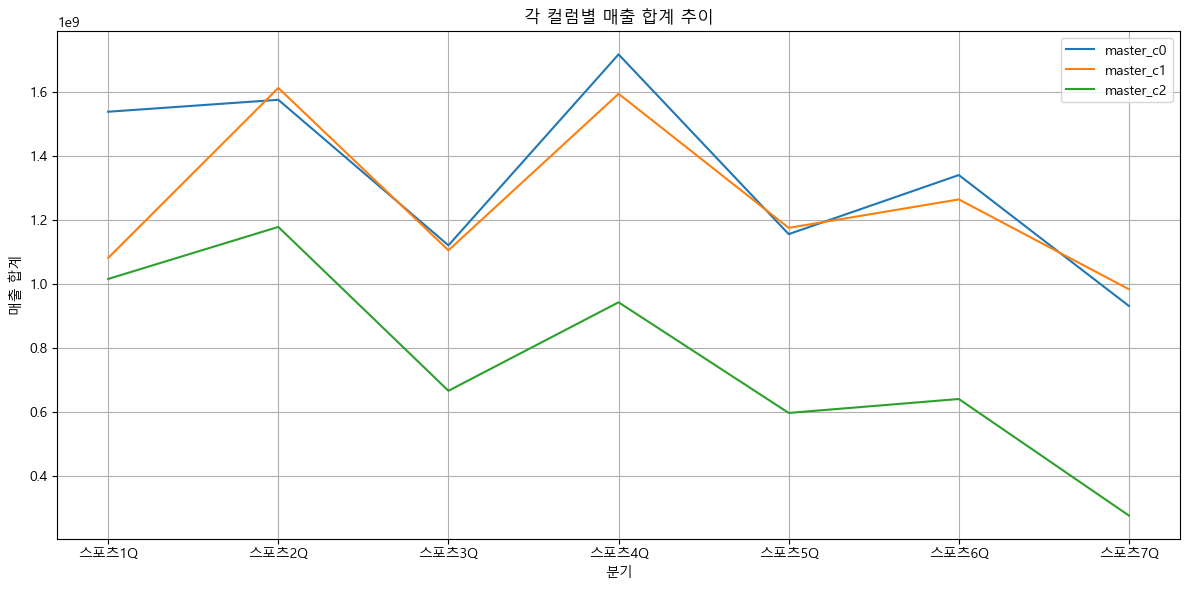

In [ ]:
# 위 shell의 카테고리를 a변수에 바꿔 넣어가면 cluster별 해당 상품 카테고리 부기별 추세를 볼 수 있음

import matplotlib.pyplot as plt

# 공통 컬럼 선택
a = '스포츠'
columns = [a+'1Q', a+'2Q', a+'3Q', a+'4Q', a+'5Q', a+'6Q', a+'7Q']

# 각 컬럼의 합 계산
master_c0_sum = master_c0[columns].sum()
master_c1_sum = master_c1[columns].sum()
master_c2_sum = master_c2[columns].sum()

# 그래프 그리기
plt.figure(figsize=(12, 6))

# master_c0의 매출 추이
plt.plot(columns, master_c0_sum, label='master_c0')

# master_c1의 매출 추이
plt.plot(columns, master_c1_sum, label='master_c1')

# master_c2의 매출 추이
plt.plot(columns, master_c2_sum, label='master_c2')

plt.xlabel("분기")
plt.ylabel("매출 합계")
plt.title("각 컬럼별 매출 합계 추이")
plt.legend()
plt.grid(True)  # 격자 추가
plt.tight_layout()
plt.show()


In [ ]:
master_c0_p

,가공,신선,외식/편의시설,일상,의료,교육/문화,뷰티,가전,가구,의류,스포츠,패션잡화,유아/아동,명품
고객번호,,,,,,,,,,,,,,
7,3.176587e+06,2.022356e+06,0.000000,2.682674e+06,9.199693e+04,30020.028057,1.161785e+06,6.798542e+04,8.371673e+05,2.251140e+07,2.478002e+06,1.628961e+07,2.127085e+05,7.151671e+06
10,6.835863e+06,5.266312e+06,0.000000,1.449186e+06,0.000000e+00,33873.978637,9.999156e+05,0.000000e+00,1.327067e+04,1.615308e+06,1.299946e+05,2.246281e+05,0.000000e+00,3.590907e+05
14,5.748625e+06,4.633147e+06,211654.538766,9.761615e+05,3.380229e+05,0.000000,1.454611e+05,2.270092e+06,2.581033e+05,1.081794e+07,2.715697e+06,1.397261e+06,1.118406e+05,2.675746e+06
17,5.007475e+06,4.068032e+07,40751.196593,7.765553e+06,1.260418e+06,0.000000,5.535808e+06,1.644960e+05,0.000000e+00,7.121717e+06,4.897515e+04,4.080651e+07,0.000000e+00,7.245799e+06
27,2.043135e+06,3.932989e+06,0.000000,1.822608e+05,1.705808e+07,0.000000,8.747088e+06,0.000000e+00,0.000000e+00,1.654244e+07,1.103663e+06,2.508237e+06,9.249252e+05,4.437048e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19304,2.096653e+07,9.566333e+06,0.000000,5.427582e+06,4.551369e+06,660800.377785,9.265612e+06,1.043019e+06,0.000000e+00,2.070129e+07,1.802683e+06,3.254781e+06,2.002213e+06,4.812876e+06
19310,3.256976e+06,2.487407e+05,0.000000,1.517659e+06,1.040481e+04,2900.969907,1.002545e+06,1.997098e+05,0.000000e+00,6.116540e+06,5.005126e+06,1.209374e+06,2.546333e+05,1.179555e+07
19314,2.426465e+06,4.074762e+06,0.000000,7.469935e+06,3.450541e+05,0.000000,4.174425e+06,1.460128e+07,3.414248e+06,6.520446e+07,2.468351e+06,3.113682e+06,1.630874e+07,1.059459e+08


In [ ]:
# '연령대' 컬럼 추가
master_c0_p['연령대'] = master_c0['연령대']
master_c0_p.head()



,가공,신선,외식/편의시설,일상,의료,교육/문화,뷰티,가전,가구,의류,스포츠,패션잡화,유아/아동,명품,연령대
고객번호,,,,,,,,,,,,,,,
7,3.176587e+06,2.022356e+06,0.000000,2.682674e+06,9.199693e+04,30020.028057,1.161785e+06,6.798542e+04,837167.332977,2.251140e+07,2.478002e+06,1.628961e+07,212708.455111,7.151671e+06,60세이상
10,6.835863e+06,5.266312e+06,0.000000,1.449186e+06,0.000000e+00,33873.978637,9.999156e+05,0.000000e+00,13270.667520,1.615308e+06,1.299946e+05,2.246281e+05,0.000000,3.590907e+05,60세이상
14,5.748625e+06,4.633147e+06,211654.538766,9.761615e+05,3.380229e+05,0.000000,1.454611e+05,2.270092e+06,258103.273863,1.081794e+07,2.715697e+06,1.397261e+06,111840.620426,2.675746e+06,60세이상
17,5.007475e+06,4.068032e+07,40751.196593,7.765553e+06,1.260418e+06,0.000000,5.535808e+06,1.644960e+05,0.000000,7.121717e+06,4.897515e+04,4.080651e+07,0.000000,7.245799e+06,60세이상
27,2.043135e+06,3.932989e+06,0.000000,1.822608e+05,1.705808e+07,0.000000,8.747088e+06,0.000000e+00,0.000000,1.654244e+07,1.103663e+06,2.508237e+06,924925.203634,4.437048e+06,60세이상


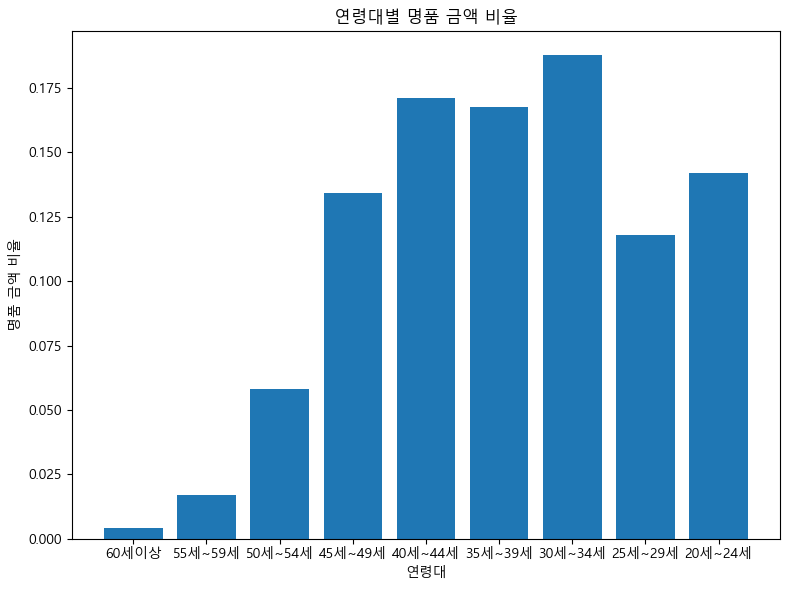

In [ ]:
import matplotlib.pyplot as plt

# 연령대 컬럼 정보
age_groups = ['60세이상', '55세~59세', '50세~54세', '45세~49세', '40세~44세', '35세~39세', '30세~34세', '25세~29세', '20세~24세']

# '명품' 컬럼에 대한 연령대별 금액 비율 계산
luxury_ratio = master_c0_p.groupby('연령대')['명품'].sum() / master_c0_p['명품'].sum()

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.bar(age_groups, luxury_ratio)
plt.xlabel("연령대")
plt.ylabel("명품 금액 비율")
plt.title("연령대별 명품 금액 비율")
plt.tight_layout()
plt.show()


In [12]:
# "8Q"가 포함된 컬럼 제거
columns_to_drop = [col for col in master_c0.columns if "건수" not in col]
master_c0_f = master_c0.drop(columns=columns_to_drop)

columns_to_drop = [col for col in master_c1.columns if "건수" not in col]
master_c1_f = master_c1.drop(columns=columns_to_drop)

columns_to_drop = [col for col in master_c2.columns if "건수" not in col]
master_c2_f = master_c2.drop(columns=columns_to_drop)


master_c2_f.head(2)

,가공건수,신선건수,외식/편의시설건수,일상건수,의료건수,교육/문화건수,뷰티건수,가전건수,가구건수,의류건수,스포츠건수,패션/잡화건수,유아/아동건수,명품건수
고객번호,,,,,,,,,,,,,,
15,337,370,0,74,1,1,22,0,1,68,14,41,0,0
18,238,177,0,55,9,0,41,2,0,100,10,65,2,1


In [202]:
import matplotlib.pyplot as plt

categories = ['가공건수', '신선건수', '외식/편의시설건수', '일상건수', '의료건수', '교육/문화건수', '뷰티건수', '가전건수',\
              '가구건수', '의류건수', '스포츠건수', '유아/아동건수', '명품건수']
sum_c0 = []  # master_c0_p에 대한 각 컬럼의 합계를 저장할 리스트
sum_c1 = []  # master_c1_p에 대한 각 컬럼의 합계를 저장할 리스트
sum_c2 = []  # master_c2_p에 대한 각 컬럼의 합계를 저장할 리스트

for column in categories:
    sum_c0.append(master_c0_p[column].sum())
    sum_c1.append(master_c1_p[column].sum())
    sum_c2.append(master_c2_p[column].sum())

bar_width = 0.2  # 바의 너비
index = np.arange(len(categories))  # x축 인덱스

plt.figure(figsize=(12, 6))

plt.bar(index, sum_c0, bar_width, label='master_c0')
plt.bar(index + bar_width, sum_c1, bar_width, label='master_c1')
plt.bar(index + (2 * bar_width), sum_c2, bar_width, label='master_c2')

plt.xlabel('Categories')
plt.ylabel('Sum')
plt.title('Sum of Categories')
plt.xticks(index + bar_width, categories, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'master_c0_p' is not defined

# 서프라이즈

In [3]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096343 sha256=3d0f14ef5dc7ba956061aef4f5679c52a86ddb75e3ce648d0f0a31bd366376f2
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [1]:
import surprise
print(surprise.__version__)

1.1.3


In [2]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [308]:
import pandas as pd
import pickle

# pkl 파일 경로
file_path = 'surprise_s.pkl'


with open(file_path, 'rb') as file:
  
    loaded_object = pickle.load(file)


df= pd.DataFrame(loaded_object)

In [155]:
import pandas as pd
import pickle

# pkl 파일 경로
file_path = 'surprise.pkl'


with open(file_path, 'rb') as file:
  
    loaded_object = pickle.load(file)


df2= pd.DataFrame(loaded_object)
df_ori2=df2

In [309]:
df


,고객번호,소분류명,개수,총구매금액,평균가
0,00001,Bag&Bag,1,186200,186200.000000
1,00001,L.B,3,599450,199816.666667
2,00001,L/C 아웃도어,1,90250,90250.000000
3,00001,MP3 外,2,64900,32450.000000
4,00001,N.B,3,1445750,481916.666667
...,...,...,...,...,...
6135638,19383,하드캔디,10,36400,3640.000000
6135639,19383,핸드로션/크림,2,9800,4900.000000
6135640,19383,핸드워시/손세정제,2,6500,3250.000000
6135641,19383,헤어에센스,3,29900,9966.666667


In [307]:
master_c2['고객번호']=master_c2['고객번호'].astype(str)
master_c2['고객번호']=master_c2['고객번호'].str.zfill(5)

In [310]:

master_c2

,고객번호,성별,연령대,거주지역,가공1Q,가공2Q,가공3Q,가공4Q,가공5Q,가공6Q,...,의료건수,교육/문화건수,뷰티건수,가전건수,가구건수,의류건수,스포츠건수,패션/잡화건수,유아/아동건수,명품건수
0,00015,F,60세이상,24.0,2.550135e+05,317206.877589,251152.286743,3.624375e+05,2.655779e+05,3.507904e+05,...,1,1,22,0,1,68,14,41,0,0
1,00018,F,60세이상,210.0,4.829637e+05,608201.137122,422215.161488,1.932143e+05,5.055686e+05,4.062252e+05,...,9,0,41,2,0,100,10,65,2,1
2,00022,F,60세이상,NaN,3.534401e+05,541804.555471,458358.810727,1.432054e+06,1.874099e+06,1.740061e+06,...,4,0,29,3,0,0,2,3,0,17
3,00047,F,60세이상,55.0,5.569555e+05,825109.042747,638028.583929,2.047746e+05,2.439809e+05,2.944997e+05,...,2,12,6,2,1,26,18,17,42,1
4,00051,F,60세이상,210.0,6.528951e+05,539511.202855,358659.677193,3.686823e+05,3.785522e+05,2.647816e+05,...,5,5,24,3,3,26,11,22,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931,19245,F,30세~34세,45.0,5.557727e+05,454305.106329,523888.373089,3.570610e+05,3.730425e+04,1.558072e+05,...,0,0,13,2,0,13,2,17,0,0
1932,19282,F,55세~59세,210.0,1.542212e+05,544517.350210,606916.376399,2.775339e+05,1.590132e+05,3.932899e+04,...,0,2,3,4,0,9,3,23,0,0
1933,19290,F,40세~44세,100.0,1.086401e+06,925860.650096,443676.093161,7.124685e+05,5.214002e+05,2.397056e+05,...,2,5,18,5,7,8,15,9,2,0
1934,19298,F,45세~49세,100.0,9.503990e+05,680013.249688,567178.840223,8.649532e+05,9.483872e+05,7.618055e+05,...,3,7,6,47,0,85,7,8,4,1


In [311]:
df

,고객번호,소분류명,개수,총구매금액,평균가
0,00001,Bag&Bag,1,186200,186200.000000
1,00001,L.B,3,599450,199816.666667
2,00001,L/C 아웃도어,1,90250,90250.000000
3,00001,MP3 外,2,64900,32450.000000
4,00001,N.B,3,1445750,481916.666667
...,...,...,...,...,...
6135638,19383,하드캔디,10,36400,3640.000000
6135639,19383,핸드로션/크림,2,9800,4900.000000
6135640,19383,핸드워시/손세정제,2,6500,3250.000000
6135641,19383,헤어에센스,3,29900,9966.666667


In [312]:
x = master_c0['고객번호'].tolist()
y= master_c1['고객번호'].tolist()
z= master_c2['고객번호'].tolist()

In [566]:
x = master_c0['고객번호'].tolist()

In [313]:
df_0=df[df['고객번호'].isin(x)]
df_1=df[df['고객번호'].isin(y)]
df_2=df[df['고객번호'].isin(z)]

In [314]:
df_1

,고객번호,소분류명,개수,총구매금액,평균가
0,00001,Bag&Bag,1,186200,186200.000000
1,00001,L.B,3,599450,199816.666667
2,00001,L/C 아웃도어,1,90250,90250.000000
3,00001,MP3 外,2,64900,32450.000000
4,00001,N.B,3,1445750,481916.666667
...,...,...,...,...,...
6124486,19334,후라이드,3,12500,4166.666667
6124487,19334,후랑크소시지,1,9280,9280.000000
6124488,19334,훈제/로스트,7,39730,5675.714286
6124489,19334,훈제오리,1,7900,7900.000000


In [330]:
0.000251*0.3

7.529999999999999e-05

In [486]:
scaler = MinMaxScaler()
scaled_count = scaler.fit_transform(df_0[['개수']])
scaled_mean_price = scaler.fit_transform(df_0[['평균가']])
scaled_price=scaler.fit_transform(df_0[['총구매금액']])

df_0['개수_scaled'] = scaled_count
df_0['평균가_scaled'] = scaled_mean_price
df_0['총구매금액_scaled']=scaled_price
df_0['합계'] = (df_0['개수_scaled']*0.7) + (df_0['평균가_scaled']*0.3)
df_0

C:\Users\h\AppData\Local\Temp\ipykernel_4800\3972513034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['개수_scaled'] = scaled_count
C:\Users\h\AppData\Local\Temp\ipykernel_4800\3972513034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['평균가_scaled'] = scaled_mean_price
C:\Users\h\AppData\Local\Temp\ipykernel_4800\3972513034.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

,고객번호,소분류명,개수,총구매금액,평균가,개수_scaled,평균가_scaled,합계,총구매금액_scaled,score
1228,00007,L/C 아웃도어,2,658350,329175.000000,0.001779,0.006066,0.003065,0.000779,7
1229,00007,L/C골프의류,2,181050,90525.000000,0.001779,0.001668,0.001746,0.000214,7
1230,00007,Local상추,1,1600,1600.000000,0.000000,0.000029,0.000009,0.000002,1
1231,00007,N.B,1,98000,98000.000000,0.000000,0.001806,0.000542,0.000116,6
1232,00007,N/B골프의류,4,652000,163000.000000,0.005338,0.003004,0.004638,0.000771,7
...,...,...,...,...,...,...,...,...,...,...
6121726,19325,하드캔디,5,15760,3152.000000,0.007117,0.000058,0.005000,0.000019,7
6121727,19325,한식델리,9,98500,10944.444444,0.014235,0.000202,0.010025,0.000116,8
6121728,19325,핸드로션/크림,1,4000,4000.000000,0.000000,0.000074,0.000022,0.000005,2
6121729,19325,햄,2,2000,1000.000000,0.001779,0.000018,0.001251,0.000002,7


In [487]:
df_0

,고객번호,소분류명,개수,총구매금액,평균가,개수_scaled,평균가_scaled,합계,총구매금액_scaled,score
1228,00007,L/C 아웃도어,2,658350,329175.000000,0.001779,0.006066,0.003065,0.000779,7
1229,00007,L/C골프의류,2,181050,90525.000000,0.001779,0.001668,0.001746,0.000214,7
1230,00007,Local상추,1,1600,1600.000000,0.000000,0.000029,0.000009,0.000002,1
1231,00007,N.B,1,98000,98000.000000,0.000000,0.001806,0.000542,0.000116,6
1232,00007,N/B골프의류,4,652000,163000.000000,0.005338,0.003004,0.004638,0.000771,7
...,...,...,...,...,...,...,...,...,...,...
6121726,19325,하드캔디,5,15760,3152.000000,0.007117,0.000058,0.005000,0.000019,7
6121727,19325,한식델리,9,98500,10944.444444,0.014235,0.000202,0.010025,0.000116,8
6121728,19325,핸드로션/크림,1,4000,4000.000000,0.000000,0.000074,0.000022,0.000005,2
6121729,19325,햄,2,2000,1000.000000,0.001779,0.000018,0.001251,0.000002,7


In [496]:
import pandas as pd
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import get_dataset_dir

def recomm_product_by_surprise(algo, userId, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0, df_for_surprise['score'].max()))


    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', 'score']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)
    predictions = algo.test(testset)

    # 예측 결과 정렬하여 상위 상품 추출
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

    recommended_products = []
    for prediction in top_predictions:
        recommended_products.append({
            '소분류명': prediction.iid,
            'score': prediction.est
        })

    return recommended_products


In [457]:
def recomm_product_by_surprise(algo, userId, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0,reader = Reader(rating_scale=(0, df_for_surprise['score'].max()))
))

    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', '합계']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset, _ = train_test_split(data, test_size=0.25, random_state=42)

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)

    # 특정 사용자에게 상품 추천
    items_to_recommend = df_for_surprise['소분류명'].unique()  # 모든 상품 추천 대상

    # 사용자가 이미 구매한 상품 제외
    items_purchased = df_for_surprise[df_for_surprise['고객번호'] == userId]['소분류명'].unique()
    items_to_recommend = [item for item in items_to_recommend if item not in items_purchased]

    # 상품 추천을 위한 테스트 데이터셋 생성
    testset = [(userId, item, 0) for item in items_to_recommend]

    # 예측 결과 얻기
    predictions = algo.test(testset)

    # 예측 결과 정렬하여 상위 상품 추출
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

    # 추천 상품 정보 출력
    recommended_products = [prediction.iid for prediction in top_predictions]

    return recommended_products


In [464]:
def recomm_product_by_surprise(algo, userId, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0, df_for_surprise['score'].max()))

    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', 'score']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)
    predictions = algo.test(testset)

    # 예측 결과 정렬하여 상위 상품 추출
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

    # 추천 상품 정보 출력
    recommended_products = []
    for prediction in top_predictions:
        recommended_products.append({
            '소분류명': prediction.iid,
            'score': prediction.est
        })

    return recommended_products




In [462]:
def recomm_product_by_surprise(algo, userId, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0, df_for_surprise['score'].max()))

    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', 'score']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)
    
    # 특정 사용자가 구매한 상품 필터링
    user_items = set(df_for_surprise[df_for_surprise['고객번호'] == userId]['소분류명'])
    
    # 테스트 데이터셋에서 산 상품만 추출
    testset_filtered = [item for item in testset if item[0] == userId and item[1] not in user_items]
    
    # 특정 사용자에게 상품 추천
    predictions = algo.test(testset_filtered)

    # 예측 결과 정렬하여 상위 상품 추출
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

    # 추천 상품 정보 출력
    recommended_products = []
    for prediction in top_predictions:
        recommended_products.append({
            '소분류명': prediction.iid,
            'score': prediction.est
        })

    return recommended_products


In [284]:
def recomm_product_by_surprise(algo, user_ids, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0, df_for_surprise['합계'].max()))

    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', '합계']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset, _ = train_test_split(data, test_size=0.25, random_state=42)

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)

    recommended_products = []
    
    for user_id in user_ids:
        # 특정 사용자에게 상품 추천
        testset = trainset.build_anti_testset()
        testset = [t for t in testset if t[0] == user_id]
        predictions = algo.test(testset)

        # 예측 결과 정렬하여 상위 상품 추출
        top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]

        # 추천 상품 정보 저장
        recommended_products_user = [prediction[1] for prediction in top_predictions]
        recommended_products.append(recommended_products_user)

    # 추천 상품 리스트를 평평하게 만듦
    recommended_products_flat = [product for sublist in recommended_products for product in sublist]

    return recommended_products_flat


In [440]:
algo = SVD(random_state=42)
# algo = KNNBasic(random_state=0)
# algo = SVD(n_epochs=20, random_state=0)

# algo.fit(trainset)

In [472]:
df_0

,고객번호,소분류명,개수,총구매금액,평균가,개수_scaled,평균가_scaled,합계,총구매금액_scaled,score
1228,00007,L/C 아웃도어,2,658350,329175.000000,0.001779,0.006066,1.479103e-03,0.000779,7
1229,00007,L/C골프의류,2,181050,90525.000000,0.001779,0.001668,1.309777e-03,0.000214,7
1230,00007,Local상추,1,1600,1600.000000,0.000000,0.000029,5.640654e-07,0.000002,1
1231,00007,N.B,1,98000,98000.000000,0.000000,0.001806,3.476275e-05,0.000116,6
1232,00007,N/B골프의류,4,652000,163000.000000,0.005338,0.003004,3.967954e-03,0.000771,7
...,...,...,...,...,...,...,...,...,...,...
6121726,19325,하드캔디,5,15760,3152.000000,0.007117,0.000058,4.987794e-03,0.000019,7
6121727,19325,한식델리,9,98500,10944.444444,0.014235,0.000202,9.999353e-03,0.000116,8
6121728,19325,핸드로션/크림,1,4000,4000.000000,0.000000,0.000074,1.415485e-06,0.000005,2
6121729,19325,햄,2,2000,1000.000000,0.001779,0.000018,1.246258e-03,0.000002,7


In [142]:
df_1.to_excel('df_1.xlsx', index=False)

In [545]:
df_0['score'].value_counts()

6     285614
3     150741
4     138421
9     115534
7     111863
8      96302
2      84106
1      49050
5      27309
10         1
Name: score, dtype: int64

In [594]:
df_0['score'].describe()

count     1058941
unique          5
top             3
freq       346622
Name: score, dtype: int64

In [347]:
import numpy as np

In [348]:
percent=[]
for i in range(0,5):
    p = np.percentile(df_0['합계'], i*5)-1
    print(p, i*5)
    percent.append(p)

percent.append(np.inf)
percent   

-1.0 0
-0.9999993224120504 5
-0.9999989428208954 10
-0.9999985064684461 15
-0.999997910474857 20


[-1.0,
 -0.9999993224120504,
 -0.9999989428208954,
 -0.9999985064684461,
 -0.999997910474857,
 inf]

In [489]:
df_0['합계']=df_0['합계']*100000

C:\Users\h\AppData\Local\Temp\ipykernel_4800\2854924939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['합계']=df_0['합계']*100000


In [491]:
df_0['합계']=df_0['합계'].astype(int)

C:\Users\h\AppData\Local\Temp\ipykernel_4800\2343650994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['합계']=df_0['합계'].astype(int)


In [492]:
df_0['합계'].describe()

count    1.058941e+06
mean     4.659681e+02
std      1.228052e+03
min      0.000000e+00
25%      4.000000e+00
50%      1.270000e+02
75%      4.020000e+02
max      7.000300e+04
Name: 합계, dtype: float64

In [543]:
df_0['합계'].describe(percentiles=[0.8])


count    1.058941e+06
mean     4.659681e+02
std      1.228052e+03
min      0.000000e+00
50%      1.270000e+02
80%      6.130000e+02
max      7.000300e+04
Name: 합계, dtype: float64

In [544]:
import numpy as np
# new_column 값을 범주에 따라 점수로 변환 (각 10%분위수 마다)
df_0['score'] = pd.cut(df_0['합계'], bins=(-1,0,1,4,30,120,370,610,1100,70000,np.inf), labels=[1,2,3,4,5,6,7,8,9,10])

C:\Users\h\AppData\Local\Temp\ipykernel_4800\3290066205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['score'] = pd.cut(df_0['합계'], bins=(-1,0,1,4,30,120,370,610,1100,70000,np.inf), labels=[1,2,3,4,5,6,7,8,9,10])


In [593]:
import numpy as np

df_0['score'] = pd.cut(df_0['합계'], bins=(-1,3,100,400,70000,np.inf), labels=[1,2,3,4,5])

C:\Users\h\AppData\Local\Temp\ipykernel_4800\352027988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['score'] = pd.cut(df_0['합계'], bins=(-1,3,100,400,70000,np.inf), labels=[1,2,3,4,5])


In [158]:
# 개수
recomm_product_by_surprise(algo, x, df_0, top_n=5)

KeyboardInterrupt: 

In [583]:
recomm_product_by_surprise(algo,'13814', df_0, top_n=5)

[{'고객번호': '13814', '소분류명': '모피'},
 {'고객번호': '13814', '소분류명': '에어컨'},
 {'고객번호': '13814', '소분류명': '건강침대(흙침대)'},
 {'고객번호': '13814', '소분류명': '김치냉장고'},
 {'고객번호': '13814', '소분류명': '일반침대'}]

In [596]:
recomm_product_by_surprise(algo,'13148', df_0, top_n=5)

[{'고객번호': '13148', '소분류명': '치즈', 'score': 4.6641792724654145},
 {'고객번호': '13148', '소분류명': '쿠키', 'score': 4.595889062586403},
 {'고객번호': '13148', '소분류명': '스포츠음료', 'score': 4.555777205476732},
 {'고객번호': '13148', '소분류명': '크래커', 'score': 4.435382947806235},
 {'고객번호': '13148', '소분류명': '냉동만두', 'score': 4.431862995823167}]

In [519]:
recomm_product_by_surprise(algo,'19304', df_0, top_n=5)

[{'고객번호': '19304', '소분류명': '청과', 'score': 4.233495389141911},
 {'고객번호': '19304', '소분류명': '유제품', 'score': 4.198574689777693},
 {'고객번호': '19304', '소분류명': '유기농채소', 'score': 4.163807164333854},
 {'고객번호': '19304', '소분류명': '채소', 'score': 4.159294284620097},
 {'고객번호': '19304', '소분류명': '농산가공', 'score': 4.145910221647153}]

In [580]:
x=['19304']

recommended_products = []

for user_id in x:
    recommendations = recomm_product_by_surprise(algo, user_id, df_0, top_n=5)
    recommended_products.extend(recommendations)

print(type(recommended_products))


<class 'list'>


In [582]:
abc = pd.DataFrame(recommended_products)
abc

,고객번호,소분류명
0,13148,치즈
1,13148,쿠키
2,13148,기능성우유
3,13148,바나나
4,13148,옥수수스낵
5,19304,청과
6,19304,유기농채소
7,19304,채소
8,19304,서적
9,19304,모피


In [304]:
recomm_product_by_surprise(algo,['18975'], df_1, top_n=10)

['우산/양산류',
 '카메라/캠코더',
 '아웃도어퍼니처',
 '지갑',
 '남성',
 '캠핑',
 '선풍기',
 '병행수입',
 '유아동특정',
 '브랜드조리']

In [595]:
def recomm_product_by_surprise(algo, userId, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0, df_for_surprise['score'].max()))

    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', 'score']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset = data.build_full_trainset()

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)

    # 개별 고객에 대한 추천 생성
    recommended_products = []
    for item_id in df_for_surprise['소분류명'].unique():
        prediction = algo.predict(userId, item_id)
        recommended_products.append({
            '고객번호': userId,
            '소분류명': item_id,
            'score': prediction.est
        })

    # 예측 평점을 기준으로 정렬하여 상위 상품 추출
    top_predictions = sorted(recommended_products, key=lambda x: x['score'], reverse=True)[:top_n]

    return top_predictions


In [587]:
def recomm_product_by_surprise(algo, userId, df_for_surprise, top_n=5):
    # Surprise 데이터셋 생성을 위한 Reader 객체 생성
    reader = Reader(rating_scale=(0, df_for_surprise['score'].max()))

    # Surprise 데이터셋 생성
    data = Dataset.load_from_df(df_for_surprise[['고객번호', '소분류명', 'score']], reader)

    # 데이터셋을 학습용과 테스트용으로 분할
    trainset = data.build_full_trainset()

    # 학습 데이터셋으로 알고리즘 학습
    algo.fit(trainset)

    # 개별 고객에 대한 추천 생성
    recommended_products = []
    for item_id in df_for_surprise['소분류명'].unique():
        prediction = algo.predict(userId, item_id)
        recommended_products.append({
            '고객번호': userId,
            '소분류명': item_id
        })

    # 예측 평점을 기준으로 정렬하여 상위 상품 추출
    top_predictions = sorted(recommended_products, key=lambda x: algo.predict(userId, x['소분류명']).est, reverse=True)[:top_n]

    return top_predictions


In [597]:
# RMSE
reader = Reader(rating_scale=(0, df_0['score'].max()))
data = Dataset.load_from_df(df_0[['고객번호', '소분류명', 'score']], reader)

trainset, testset = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9411


0.9410939853118222

In [220]:
# 개수 scaled
rec_pd1=recomm_product_by_surprise(algo,['06207','08079','06355','00947','00562','09136','09776','02450','01733','03755','06128','01348','06950','17456','02591','00841','04174','04251','06404','00140','01138','12317','04818','04369','06236','03566','07842','07143','01641','10845','05028','08097','09668','00073','00670','00505','04134','05825','04761','06287','08184','16449','02239','10799','02679','01407','06587','07148','01607','02957','04984','02643','06863','07378','17435','05527','02472','02484','06008','09603','08351','03880','08798','01766','08042','07039','10394','02126','06998','04820','08449','10697','06454','14999','05697','03178','03102','10528','13480','07392','09432','06828','09513','09312','00508','05003','09881','06833','07638','04800','04517','08993','13773','07259','15636','15620','01441','03496','10570','04799','02429','01421','00521','04494','00337','00225','15052','11625','08233','09121','03076','05322','00399','09456','14382','06732','14649','00635','05824','03464','00416','00547','11774','09348','01992','13270','02716','05725','17540','02202','02266','09421','05592','01238','03953','04821','16297','17575','02219','02230','02834','02336','02050','06543','07926','08517','08082','01803','02300','00254','11322','03562','05468','10899','11603','00640','06181','07141','07832','05881','06323','09036','06761','01603','12443','07778','02205','08134','11136','15475','09245','04117','07320','00026','06439','04260','14150','00305','01864','16238','05645','02671','01108','00810','11330','08937','08747','02370','06109','00201','17219','07413','12740','12899','01843','07745','04382','07635','15506','03335','04720','04475','06690','02665','06310','04465','04039','11125','15587','05555','05623','01550','17231','11101','07648','04546','05529','10295','01446','17620','17551','04121','15643','02006','07287','08341','01133','05762','05360','03391','08209','15180','00928','00367','06217','00946','01347','12621','03356','03340','08130','16259','08822','08512','08044','03748','01243','01988','14594','08174','12157','14292','02156','09110','01889','04232','14754','06302','18214','09388','04988','17347','03412','03457','14456','07227','09620','08089','00335','14851','02168','09192','00002','06252','02662','08539','02049','08918','00792','11745','01365','13435','04922','17262','04344','00565','11460','18975','08515','15751','10687','08910','04630','07967','03135','14509','01229','01014','01040','10364','07610','05310','07704','17569','02645','00504','04633','14011','18494','16006','12657','07938','03179','08985','13951','04589','15038','13564','01375','02998','04664','03399','05317','08771','03362','08422','02695','07381','05630','13115','08641','09361','05938','00001','01957','13271','13102','00177','06785','01317','06728','09460','08866','15384','05582','14047','04026','05681','02604','02143','01782','00309','03883','12034','05817','06291','02494','03524','02776','03164','07718','04588','07052','14294','06939','14715','07509','16876','04318','04774','01176','04523','04138','00962','08222','03994','01301','08191','02753','02007','05270','00377','14175','02949','08232','01006','00029','02541','05496','02774','00438','15735','01310','09454','09425','09233','09058','02365','17654','08786','13406','00937','01609','08758','06925','14472','03633','00349','06258','06428'], df_1, top_n=5) 

In [246]:
rec_pd1=recomm_product_by_surprise(algo,['06207','08079','06355','00947','00562','09136','09776','02450','01733','03755','06128','01348','06950','17456','02591','00841','04174','04251','06404','00140','01138','12317','04818','04369','06236','03566','07842','07143','01641','10845','05028','08097','09668','00073','00670','00505','04134','05825','04761','06287','08184','16449','02239','10799','02679','01407','06587','07148','01607','02957','04984','02643','06863','07378','17435','05527','02472','02484','06008','09603','08351','03880','08798','01766','08042','07039','10394','02126','06998','04820','08449','10697','06454','14999','05697','03178','03102','10528','13480','07392','09432','06828','09513','09312','00508','05003','09881','06833','07638','04800','04517','08993','13773','07259','15636','15620','01441','03496','10570','04799','02429','01421','00521','04494','00337','00225','15052','11625','08233','09121','03076','05322','00399','09456','14382','06732','14649','00635','05824','03464','00416','00547','11774','09348','01992','13270','02716','05725','17540','02202','02266','09421','05592','01238','03953','04821','16297','17575','02219','02230','02834','02336','02050','06543','07926','08517','08082','01803','02300','00254','11322','03562','05468','10899','11603','00640','06181','07141','07832','05881','06323','09036','06761','01603','12443','07778','02205','08134','11136','15475','09245','04117','07320','00026','06439','04260','14150','00305','01864','16238','05645','02671','01108','00810','11330','08937','08747','02370','06109','00201','17219','07413','12740','12899','01843','07745','04382','07635','15506','03335','04720','04475','06690','02665','06310','04465','04039','11125','15587','05555','05623','01550','17231','11101','07648','04546','05529','10295','01446','17620','17551','04121','15643','02006','07287','08341','01133','05762','05360','03391','08209','15180','00928','00367','06217','00946','01347','12621','03356','03340','08130','16259','08822','08512','08044','03748','01243','01988','14594','08174','12157','14292','02156','09110','01889','04232','14754','06302','18214','09388','04988','17347','03412','03457','14456','07227','09620','08089','00335','14851','02168','09192','00002','06252','02662','08539','02049','08918','00792','11745','01365','13435','04922','17262','04344','00565','11460','18975','08515','15751','10687','08910','04630','07967','03135','14509','01229','01014','01040','10364','07610','05310','07704','17569','02645','00504','04633','14011','18494','16006','12657','07938','03179','08985','13951','04589','15038','13564','01375','02998','04664','03399','05317','08771','03362','08422','02695','07381','05630','13115','08641','09361','05938','00001','01957','13271','13102','00177','06785','01317','06728','09460','08866','15384','05582','14047','04026','05681','02604','02143','01782','00309','03883','12034','05817','06291','02494','03524','02776','03164','07718','04588','07052','14294','06939','14715','07509','16876','04318','04774','01176','04523','04138','00962','08222','03994','01301','08191','02753','02007','05270','00377','14175','02949','08232','01006','00029','02541','05496','02774','00438','15735','01310','09454','09425','09233','09058','02365','17654','08786','13406','00937','01609','08758','06925','14472','03633','00349','06258','06428'], df_1, top_n=5) 

In [267]:
rec_pd0 = rec_pd0[0]


In [256]:
rec_pd1

('베이스메이크업',
 '스포츠의류',
 '주유소',
 '여행용품',
 '주니어스포츠',
 '냉장고',
 '전기포트',
 '멸치황태미역선물세트',
 '데일리처분',
 '건강가전',
 '아웃도어퍼니처',
 '드레스화브랜드',
 '냉장햄세트',
 '가습기',
 '기기',
 '프리미엄매트',
 'PC',
 '일반서적',
 '전기면도기',
 '도미/민어',
 '음반',
 '핸드백',
 '김선물세트',
 '일반서적',
 '가공란',
 '선풍기',
 '시즌반찬',
 '세탁기',
 '음반',
 '남성스포츠특정',
 '커피메이커/머신',
 '썬글라스',
 '선풍기',
 '생활소형가전',
 '아동침구류',
 '여성특정',
 '가공란',
 '헤어케어',
 '약초',
 '데일리처분',
 '시니어건강용품',
 '조리기',
 '선케어',
 '양말류',
 '여성',
 '가습기',
 '핸드백',
 'DIY욕실용품',
 '롤러보드',
 '아웃도어퍼니처',
 '전자/전기',
 '국산과일선물세트',
 '립메이크업',
 'PC',
 '휴지통',
 '제기용품',
 '히터기',
 '슈즈행사',
 'NAVI/하이패스',
 '브랜드조리',
 '기타주방가전',
 '한우선물세트',
 '제기용품',
 '스포츠슈즈',
 '카메라/캠코더',
 '지갑',
 '아이메이크업',
 '카메라/캠코더',
 '여성특정',
 '남성스포츠특정',
 '캠핑',
 '기타주방가전',
 '지갑/벨트',
 '스포츠슈즈',
 '피트니스',
 '오렌지과일선물세트',
 '여성',
 '이벤트조리',
 '공기청정기',
 '아웃도어퍼니처',
 '스포츠브랜드편집',
 '골프',
 '온라인버섯/열매채소',
 '멸치황태미역선물세트',
 '수입육선물세트',
 '가습기',
 '건강기능식품',
 '집중케어',
 '가구/인테리어샵',
 '시니어위생용품',
 '공기청정기',
 '썬글라스',
 '건강가전',
 '주니어스포츠',
 '자전거',
 '프리미엄매트',
 '여행용품',
 '선풍기',
 '기타국소고기',
 'DIY욕실용품',
 '여행용품',
 '약초',


In [221]:
rec_pd1

['차/커피',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '차/커피',
 '커리어',
 '냉장기타MS',
 '베이커리',
 '일용잡화',
 '차/커피',
 'SPORTS/OUTDOOR',
 '주방정리',
 '일용잡화',
 '교환/보수용품',
 '차/커피',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '친환경채소',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '베이커리',
 '일용잡화',
 '커리어',
 '냉장기타MS',
 '주방정리',
 '교환/보수용품',
 '친환경채소',
 '섬유잡화',
 '차/커피',
 '커리어',
 '냉장기타MS',
 '일용잡화',
 '섬유잡화',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '차/커피',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '베이커리',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '베이커리',
 '일용잡화',
 '커리어',
 '냉장기타MS',
 '주방정리',
 '베이커리',
 '교환/보수용품',
 '커리어',
 '냉장기타MS',
 '교환/보수용품',
 '호주산소고기',
 '국내산계육',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '베이커리',
 '섬유잡화',
 '차/커피',
 '커리어',
 '냉장기타MS',
 '주방정리',
 '차/커피',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '베이커리',
 '교환/보수용품',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '주방정리',
 '베이커리',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '일용잡화',
 '국내산계육',
 '차/커피',
 '커리어',
 'SPORTS/OUTDOOR',
 '냉장기타MS',
 '베이커리',
 '차/커피',
 '커리어',
 'SPORTS/OU

In [268]:
#cluster0 개수별
from collections import Counter

rec_pd0 = tuple(rec_pd0)  # 리스트를 튜플로 변환
element_counts = Counter(rec_pd0)
print(element_counts)

Counter({'안전용품': 305, '즉석식품': 258, '파이': 244, '냉동만두': 234, '두부': 178, '위생용품': 109, '열매채소': 99, '단무지류': 70, '흰우유': 70, '편의시설': 35, '먹거리': 14, '브랜드빵': 12, '헬스용품': 7, '성인침구류': 3, '란제리브랜드': 2, '전통주': 2, '잡곡': 2, '수산품': 1})


In [261]:
#cluster0 총금액별 
from collections import Counter

rec_pd0 = tuple(rec_pd0)  # 리스트를 튜플로 변환
element_counts = Counter(rec_pd0)
print(element_counts)

Counter({'조리기': 37, '테이블': 37, '건강디지털기기': 29, '남성스포츠NPB': 27, '카메라/캠코더': 24, '오디오': 23, '에어컨': 22, '아웃도어퍼니처': 21, '생선선물세트': 20, '전기포트': 19, '오렌지과일선물세트': 19, '마른안주선물세트': 18, 'PC': 18, '우산/양산류': 17, '여성특정': 17, '베이스메이크업': 17, '해물선물세트': 16, '스키': 16, '생활소형가전': 15, '시즌반찬': 15, '웨딩': 15, '약초': 15, '수입육선물세트': 15, '공기청정기': 15, '청소기': 15, '유아동특정': 15, '남성행사': 14, '남성구두': 14, '가습기': 14, '브랜드조리': 14, '남성어덜트캐주얼': 14, '세탁기': 14, '립메이크업': 14, '방향/제습/탈취제': 14, 'DIY욕실용품': 13, '규격생선선물세트': 13, '지갑': 13, '데일리처분': 13, '여성NPB': 13, '프리미엄매트': 13, '선풍기': 12, '교복': 12, '여성': 12, '낚시': 12, '건강기능식품': 12, '커피메이커/머신': 12, '전기면도기': 12, '남성베이직': 12, '남성스포츠특정': 11, '양말류': 11, '이벤트조리': 11, '이동통신': 11, '홈시어터': 11, '계절팩': 11, '컴퓨터주변기기': 11, '여성구두': 11, '피트니스': 11, '주유소': 11, '지갑/벨트': 11, '멸치황태미역선물세트': 11, '롤러보드': 10, '스카프': 10, '핸드백': 10, '의자/상': 10, '주니어웨어': 10, '유아동NPB': 10, '전자악기': 10, '기기': 10, '여성베이직': 10, '네일메이크업': 10, '장착용품': 10, '굴비/반건생선선물세트': 9, '소형음향기기': 9, '열대과일선물세트': 9, '냉장햄세트': 9, '밥솥': 9, '아동화브랜드': 9, '온

In [248]:
from collections import Counter

rec_pd1 = tuple(rec_pd1)  # 리스트를 튜플로 변환
element_counts = Counter(rec_pd1)
print(element_counts)

Counter({'여행용품': 56, 'TV': 38, '수입육선물세트': 36, '아웃도어퍼니처': 32, '건강가전': 31, '계절팩': 31, '선풍기': 26, '히터기': 26, '온라인버섯/열매채소': 26, '브랜드조리': 25, '해물선물세트': 25, '가습기': 24, '전기면도기': 24, '테이블': 24, 'DVD': 24, '남성스포츠특정': 22, '피트니스': 22, '이벤트조리': 22, '공기청정기': 22, '주니어스포츠': 21, '프리미엄매트': 21, '썬글라스': 21, '제기용품': 20, '냉장고': 19, '데일리처분': 19, '핸드백': 19, '패스트푸드': 19, '병행수입': 19, '약초': 18, '조리기': 18, '지갑': 18, '온라인양말': 18, '차선물세트': 18, '냉장햄세트': 17, '기기': 17, '음반': 17, '전자/전기': 17, '카메라/캠코더': 17, '오렌지과일선물세트': 17, '기타국소고기': 17, '가방브랜드': 17, '수입브랜드': 17, '스키': 17, '여성NPB': 17, '남성케어': 17, '베이스메이크업': 16, '여성특정': 16, '선케어': 16, '시니어위생용품': 16, '시즌/건강가전': 16, '청소기': 16, '영상': 16, '밥솥': 16, 'DIY욕실용품': 15, '립메이크업': 15, '기타주방가전': 15, '동물병원': 15, '교복': 15, '믹서기': 15, '캠핑': 14, '유아동특정': 14, '에어컨': 14, '네일메이크업': 14, '슈즈행사': 13, '남성구두': 13, '블라우스': 13, '생활소형가전': 12, '시니어건강용품': 12, '스포츠브랜드편집': 12, '방향/제습/탈취제': 12, '윈터스포츠': 12, '기타음향기기': 12, '상': 12, '벨트': 12, '의자': 12, '김선물세트': 11, '집중케어': 11, '기타': 11, '전기요/장판': 11, '선식

In [223]:
from collections import Counter

rec_pd1 = tuple(rec_pd1)  # 리스트를 튜플로 변환
element_counts = Counter(rec_pd1)
print(element_counts)



Counter({'냉장기타MS': 389, 'SPORTS/OUTDOOR': 356, '주방정리': 270, '베이커리': 238, '커리어': 216, '교환/보수용품': 185, '차/커피': 111, '섬유잡화': 97, '친환경채소': 66, '일용잡화': 65, '호주산소고기': 29, '화장품브랜드샵': 13, '국내산계육': 8, '고등어/삼치': 3, '물티슈': 2, '애견용품': 1, '건어가공': 1})


In [112]:
# 평균가 scaled

recomm_product_by_surprise(algo, '00007', df_0, top_n=10)

['핸드백',
 '유아동특정',
 '오렌지과일선물세트',
 '믹서기',
 '가습기',
 '악기',
 '건강가전',
 '홈시어터',
 '스키',
 '가방브랜드']

In [ ]:
recomm_product_by_surprise(algo, '00007', df_0, top_n=10)

In [598]:
import pandas as pd
from surprise import Reader, Dataset

ratings = df

reader = Reader(rating_scale=(0.5, 5.0))


data = Dataset.load_from_df(df_0[['고객번호','소분류명','score']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.9411


0.9410932647275146

In [126]:
import pandas as pd
from surprise import Reader, Dataset

ratings = df

reader = Reader(rating_scale=(0.5, 5.0))


data = Dataset.load_from_df(df_0[['고객번호','중분류명','합계']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(random_state=0)
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.4916


0.49156951519855313

In [131]:
import pandas as pd
from surprise import Reader, Dataset
from surprise import SVD
from surprise.model_selection import GridSearchCV

# 데이터 로드
ratings = df_0
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df_0[['고객번호', '중분류명', '개수_scaled']], reader)

# 하이퍼파라미터 그리드 설정
param_grid = {'n_factors': [10, 20, 30],
              'reg_all': [0.005, 0.01, 0.02]}

# GridSearchCV를 사용하여 모델 튜닝
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# 최적의 하이퍼파라미터와 그 때의 RMSE 출력
print(gs.best_params['rmse'])
print(gs.best_score['rmse'])


{'n_factors': 10, 'reg_all': 0.005}
0.49209332559512947


In [15]:
df[df.고객번호 == '00007'].sort_values(by='합계', ascending=False)

,고객번호,소분류명,합계
1448,00007,청과,0.048385
1484,00007,한식델리,0.045557
1327,00007,브랑제리,0.044135
1366,00007,숙녀고정행사,0.039713
1372,00007,시니어,0.032240
...,...,...,...
1303,00007,마시는요구르트,0.000014
1490,00007,혼합탄산,0.000014
1277,00007,냉장면,0.000014
1364,00007,수입콩나물,0.000014


In [35]:
# DatasetAutoFolds - 데이터 세트 전체를 학습 데이터로 사용하게 해 줌
# build_full_trainset() - 위의 클래스로 객체를 생성한 뒤, 이 메서드를 호출하면 전체 데이터를
# 학습 데이터 세트로 만들 수 있음

from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성.
df_for_surprise.to_csv('/content/drive/Othercomputers/내 컴퓨터/hmkd1/dataset/ml-latest-small/df_for_surprise.csv', index=False, header=False)
data_folds = DatasetAutoFolds(ratings_file='/content/drive/Othercomputers/내 컴퓨터/hmkd1/dataset/ml-latest-small/df_for_surprise.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함.
trainset = data_folds.build_full_trainset()

In [37]:
# 추천 대상 영화 list
# [Prediction(uid='9', iid='1', r_ui=None, est=3.6398015009715396, details={'was_impossible': False}),
#  Prediction(uid='9', iid='2', r_ui=None, est=3.0708535569743463, details={'was_impossible': False}),...]

def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est

    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)    # 내림차순임
    top_predictions= predictions[:top_n]

    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]

    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

NameError: ignored

In [71]:
recomm_product_by_surprise(algo, '00007', df, top_n=10)

['유아브랜드', '액상조미료', '전통과자', '사과', '간편조리행사', '기타의류', '대중선어', '잼', '식기', '마른안주']

In [11]:
recomm_product_by_surprise(algo, '00007', df, top_n=10)

Computing the msd similarity matrix...
Done computing similarity matrix.


['과자', '음료', '주유소', '기초화장품', '화장품브랜드샵', '아동', '푸드코트', '애견용품', '국내화장품', '편의시설']

NameError: ignored

In [12]:
import pandas as pd
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate

# reader = Reader(rating_scale=(0.5, 5.0))
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df[['고객번호', '중분류명', '개수']], reader)

algo = SVD(random_state=0)
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    23.1904 23.3987 23.2274 23.1508 23.2154 23.2365 0.0852  
MAE (testset)     8.4300  8.4087  8.4129  8.4108  8.4055  8.4136  0.0086  
Fit time          33.05   31.88   32.06   30.03   31.93   31.79   0.98    
Test time         11.33   5.87    6.89    7.79    5.95    7.56    2.01    


{'test_rmse': array([23.19035253, 23.39872752, 23.22740574, 23.15077044, 23.21538997]),
 'test_mae': array([8.43003437, 8.40871035, 8.41294092, 8.41082234, 8.4054632 ]),
 'fit_time': (33.0541250705719,
  31.881619215011597,
  32.06323289871216,
  30.025591373443604,
  31.92580008506775),
 'test_time': (11.333791255950928,
  5.865387439727783,
  6.885962963104248,
  7.788859844207764,
  5.945485830307007)}

In [ ]:
from surprise import KNNBasic

# KNNBasic 알고리즘 인스턴스 생성
knn_algo = KNNBasic(k=50, min_k=5, sim_options={'name': 'pearson', 'user_based': True}, verbose=True)


서프라이즈(Surprise)는 추천 시스템을 위한 파이썬 라이브러리로, KNNBasic은 Surprise 패키지의 K-최근접 이웃(K-Nearest Neighbors) 알고리즘 중 하나입니다. KNNBasic 알고리즘을 사용할 때 주요한 매개변수들은 다음과 같습니다:

k (기본값: 40): 최근접 이웃의 개수를 의미합니다. 이웃의 개수가 많을수록 모델의 복잡도가 증가하고 실행 시간이 더 오래 걸릴 수 있습니다. 적절한 k 값을 설정하는 것은 모델의 성능에 영향을 미칩니다.

min_k (기본값: 1): 예측을 수행하기 위해 최소한 필요한 이웃의 개수입니다. min_k 이하의 이웃을 가진 사용자나 상품에 대해서는 예측을 수행하지 않습니다.

sim_options: 유사도 계산 방법을 설정하는 옵션입니다. 주요 매개변수로는 name과 user_based가 있습니다. name은 유사도 계산 방법을 선택하며, "cosine", "pearson", "pearson_baseline", "msd", "cosine_baseline" 등이 사용될 수 있습니다. user_based는 유사도를 계산하는 방향을 의미하며, True일 경우 사용자 기반 유사도를, False일 경우 상품 기반 유사도를 사용합니다.

verbose (기본값: True): 알고리즘의 실행 과정을 출력할지 여부를 설정합니다. True로 설정하면 실행 과정이 출력되고, False로 설정하면 출력이 생략됩니다.

이러한 매개변수들을 조정하여 KNNBasic 알고리즘을 설정할 수 있습니다. 예를 들어, 아래는 KNNBasic 알고리즘의 매개변수 설정 예시입니다:

UserId - 고객ID
ItemId - 상품분류체계(대분류, 유형, 고중저가 등의 형태)
ratings - 구매횟수(빈도), 구매금액 -> 지수화

In [24]:
# # 기존 master_c0 등을 서프라이즈에 맞게끔 가공하는 코드

# import pandas as pd
# from surprise import Dataset
# from surprise import Reader

# # 건수 컬럼들을 하나의 컬럼으로 합치기
# master_c0_f['Total_count'] = master_c0_f.sum(axis=1)

# # 데이터프레임을 Surprise 라이브러리의 Dataset 형식으로 변환
# reader = Reader(rating_scale=(0, 1))  # rating_scale은 예시로 설정한 범위에 맞게 조정해주세요

# # 데이터프레임에서 사용자 ID, 아이템 ID, 평점 컬럼으로 구성된 새로운 데이터프레임 생성
# df_for_surprise = pd.DataFrame({'고객번호': master_c0_f.index.repeat(len(master_c0_f.columns)),
#                                '상품': master_c0_f.columns.tolist() * len(master_c0_f),
#                                '횟수': master_c0_f.values.flatten()})

# dataset = Dataset.load_from_df(df_for_surprise, reader)

# # 결과 확인
# df_for_surprise


,고객번호,상품,횟수
0,7,가공건수,312
1,7,신선건수,137
2,7,외식/편의시설건수,0
3,7,일상건수,68
4,7,의료건수,2
...,...,...,...
49585,19325,스포츠건수,20
49586,19325,패션/잡화건수,10
49587,19325,유아/아동건수,5
49588,19325,명품건수,10
